#EasyVisa Project

# Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.


In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


# Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing Necessary Libraries

In [ ]:
# This command will make Python code more structured
%load_ext nb_black

# Make warnings not displayed
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Library for splitting data
from sklearn.model_selection import train_test_split

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set limits on number of displayed columns and rows
pd.set_option("display.max_columns", None)  # no maximum limit
pd.set_option("display.max_rows", 200)  # maximum of 200 rows

# Library for building and showing decision tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Library for Bagging ensemble technique
from sklearn.ensemble import BaggingClassifier

# Library for Random Forest ensemble technique
from sklearn.ensemble import RandomForestClassifier

# Library for AdaBoost ensemble technique
from sklearn.ensemble import AdaBoostClassifier

# Library for Gradient Boosting ensemble technique
from sklearn.ensemble import GradientBoostingClassifier

# Library for XGBoost ensemble technique
from xgboost import XGBClassifier

# Library for Stacking ensemble technique
from sklearn.ensemble import StackingClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# Libraries for calculating different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    make_scorer,
    confusion_matrix,
)

<IPython.core.display.Javascript object>

# Importing and Checking Data

In [ ]:
# Read data and create a data frame
df_orig = pd.read_csv("EasyVisa.csv")  # original data frame

# Create a copy of original data frame for further steps
df_0 = df_orig.copy()

<IPython.core.display.Javascript object>

In [ ]:
# Print size of data frame
print(
    f"There are {df_0.shape[0]} rows and {df_0.shape[1]} columns in the original data frame."
)

There are 25480 rows and 12 columns in the original data frame.


<IPython.core.display.Javascript object>

In [ ]:
# Show sample rows of original data
df_0.sample(10, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


<IPython.core.display.Javascript object>

##### Observations
- The column names all seem fine and do not need modification.
- The column `case_id` could be removed, as it does not contain any data usable in the prediction models.
- The values in the columns `has_job_experience`, `requires_job_training`, and `full_time_poistion` are *Y* or *N*, so they could be encoded as 1 and 0, respectively.
- The education levels stored in the column `education_of_employee` could be replaced with ordinal integer values.
- The variable `yr_of_estab` is hard to interpret, so it could be transformed into *years since establishment*.
- The unit of `prevaliling_wage` is not constant, so it would make this parameter more interpretable if its unit is made constant. This will reduce the number of independent variables as `unit_of_wage` will be removed.

In [ ]:
# Check for duplicate rows
dplct_no = df_0.duplicated().sum()
print(f"There are {dplct_no} duplicate rows in the data.")

There are 0 duplicate rows in the data.


<IPython.core.display.Javascript object>

In [ ]:
# Check types of data columns and number of non-null values in each column
df_0.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 25480 entries, 0 to 25479

Data columns (total 12 columns):

 #   Column                 Non-Null Count  Dtype  

---  ------                 --------------  -----  

 0   case_id                25480 non-null  object 

 1   continent              25480 non-null  object 

 2   education_of_employee  25480 non-null  object 

 3   has_job_experience     25480 non-null  object 

 4   requires_job_training  25480 non-null  object 

 5   no_of_employees        25480 non-null  int64  

 6   yr_of_estab            25480 non-null  int64  

 7   region_of_employment   25480 non-null  object 

 8   prevailing_wage        25480 non-null  float64

 9   unit_of_wage           25480 non-null  object 

 10  full_time_position     25480 non-null  object 

 11  case_status            25480 non-null  object 

dtypes: float64(1), int64(2), object(9)

memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

##### Observations
- Considering that the total of rows is 25480, none of the columns have null/missing values.
- Among the 11 columns of data (excluding `case_id`), 3 are of numeric type and the remaining 8 are of non-numeric type.
    - Numeric:
        - *Integer:* `no_of_employees` and `yr_of_estab`
        - *Float:* `prevailing_wage`
    - Non-numeric:
        - *Object:* `continent`, `education_of_employee`, `has_job_experience`, `requires_job_training`, `region_of_employment`, `unit_of_wage`, `full_time_position`, and `case_status`

In [ ]:
# Check statistical summary of numeric data
df_0.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

##### Observations
- The mean and median values of `no_of_employees` are 5667 and 2109, respectively, implying a right-skewed distribution.
- The maximum value of `no_of_employees` is above 600000, which is quite high but possible.
- The minimum value of `no_of_employees` is -26, i.e., negative, which is unreasonable. The negative values should be treated as missing values.
- The oldest and newest employers have been established since (`yr_of_estab` =) 1800 and 2016, respectively.
- The distribution of `prevailing_wage` is difficult to interpret at this point, because its unit varies across the rows. However, the minimum value is above zero, which is reasonable.

In [ ]:
# Check statistical summary of non-numeric data
df_0.describe(include=["object"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<IPython.core.display.Javascript object>

In [ ]:
# Identify unique values of categorical data columns
cat_cols = df_0.select_dtypes(include="object").columns  # columns of object data type

for col in cat_cols:
    print("Unique values in the column", col, "are:")
    print(df_0[col].value_counts())
    print("=" * 60)

Unique values in the column case_id are:

EZYV01       1

EZYV16995    1

EZYV16993    1

EZYV16992    1

EZYV16991    1

            ..

EZYV8492     1

EZYV8491     1

EZYV8490     1

EZYV8489     1

EZYV25480    1

Name: case_id, Length: 25480, dtype: int64


Unique values in the column continent are:

Asia             16861

Europe            3732

North America     3292

South America      852

Africa             551

Oceania            192

Name: continent, dtype: int64


Unique values in the column education_of_employee are:

Bachelor's     10234

Master's        9634

High School     3420

Doctorate       2192

Name: education_of_employee, dtype: int64


Unique values in the column has_job_experience are:

Y    14802

N    10678

Name: has_job_experience, dtype: int64


Unique values in the column requires_job_training are:

N    22525

Y     2955

Name: requires_job_training, dtype: int64


Unique values in the column region_of_employment are:

Northeast    7195

South        

<IPython.core.display.Javascript object>

##### Observations
- The majority of employees are from *Asia*.
- The majority of employees have a *Bachelor's* degree.
- Most of the employees have job experience.
- The vast majority of the jobs do not require training.
- The regions *Northeast*, *South*, and *West* need most of the employees.
- The available units for wage are *Year*, *Hour*, *Week*, and *Month*. The majority of the wage values in the data are per year.
- The vast majority of the applications are for full-time positions.
- Near 2/3 of the visa applications are certified.

In [ ]:
# Drop case_id column before EDA, as it has no meaning for analyses and modeling
df_0.drop("case_id", axis=1, inplace=True)

<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

# a) Univariate Analysis

#### User-Defined Functions for Univariate Plots

In [ ]:
# User-defined function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(
    data, feature, xlabel, ylabel, figsize=(8, 6), kde=False, bins=None
):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    xlabel: label of x-axis
    ylabel: label of y-axis
    figsize: size of figure (default (8, 6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Set2"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

    ax_box2.set_xlabel("", fontsize=16)  # remove label of 1st x-axis
    ax_hist2.set_xlabel(xlabel, fontsize=16)  # set 2nd x-axis label
    ax_hist2.set_ylabel(ylabel, fontsize=16)
    # set y-axis label

<IPython.core.display.Javascript object>

In [ ]:
# User-defined function to create labeled barplots
def labeled_barplot(data, feature, xlabel, ylabel, perc=False, n=None):
    """
    Barplot with percentage to the left

    data: dataframe
    feature: dataframe column
    xlabel: label of x-axis
    ylabel: label of y-axis
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(8, 0.5 * count + 1))
    else:
        plt.figure(figsize=(8, 0.5 * n + 1))

    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    ax = sns.countplot(
        data=data,
        y=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_width() / total
            )  # percentage of each class of the category
        else:
            label = p.get_width()  # count of each level of the category

        y = p.get_y() + p.get_height() / 2
        x = p.get_width()

        ax.annotate(
            label,
            (x, y),
            ha="left",
            va="center",
            size=12,
            xytext=(0, 0),
            textcoords="offset points",
        )  # annotate the percentage

    ax.set_xlabel(xlabel, fontsize=16)  # set x-axis label
    ax.set_ylabel(ylabel, fontsize=16)  # set y-axis label

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Continent of Origin

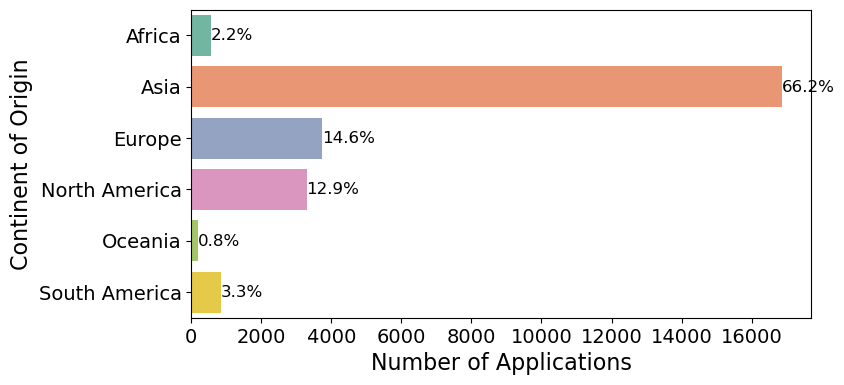

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="continent",
    xlabel="Number of Applications",
    ylabel="Continent of Origin",
    perc=True,
)

##### Observations
- The majority (66%) of the visa applicants are from *Asia*, which makes sense given the high population of this continent.
- The lowest fraction (<1%) of the applicants are from *Oceania*, which also makes sense given its very low population.
- *North America* and *Europe* have close number of applicants (12.9% and 14.6%).

#### Education Level

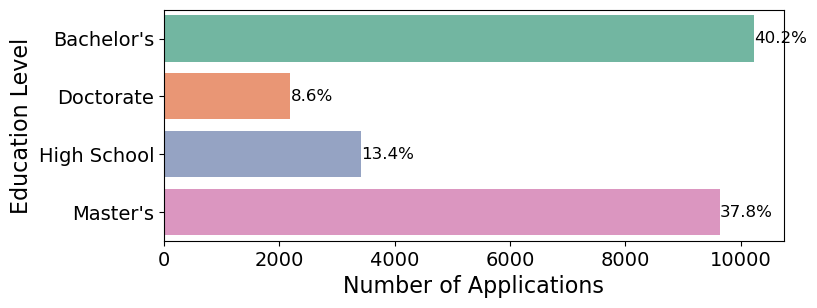

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="education_of_employee",
    xlabel="Number of Applications",
    ylabel="Education Level",
    perc=True,
)

##### Observations
- The majority of the applicants have either bachelor's degrees (40.2%) or master's degrees (37.8%).
- Only 8.6% of the applicants have doctorate degrees.

#### Job Experience

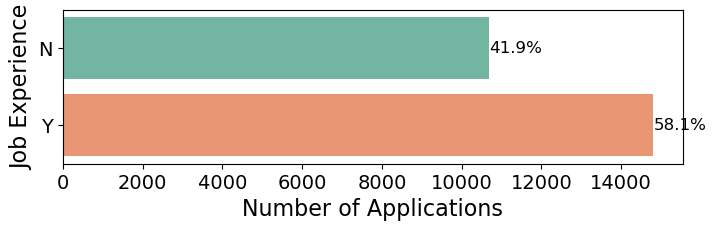

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="has_job_experience",
    xlabel="Number of Applications",
    ylabel="Job Experience",
    perc=True,
)

##### Observations
- More than half (58%) of the applicants have job experience.

#### Job Training Requirement

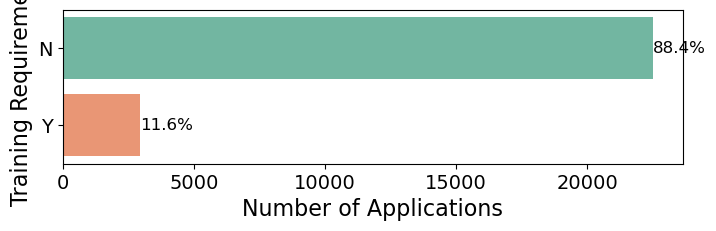

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="requires_job_training",
    xlabel="Number of Applications",
    ylabel="Training Requirement",
    perc=True,
)

##### Observations
- The vast majority (>88%) of the jobs do not require the applicants to receive training.

#### Employer Region

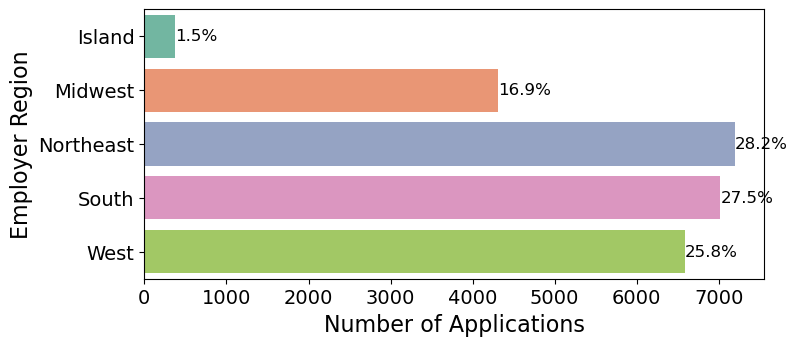

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="region_of_employment",
    xlabel="Number of Applications",
    ylabel="Employer Region",
    perc=True,
)

##### Observations
- Most of the applications are for employment in the *Northeast*, *South*, and *West* regions of the United States. This could be expected because the majority of the tech companies are in those regions and the populations of those regions are higher than the other regions of the United States.
- The *Island* region has the lowest number (1.5%) of work visa applicants.

#### Position Type

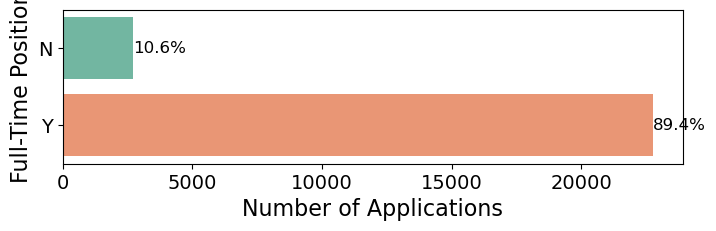

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="full_time_position",
    xlabel="Number of Applications",
    ylabel="Full-Time Position",
    perc=True,
)

##### Observations
- More than 89% of the applications are related to full-time employment.

#### Wage Unit

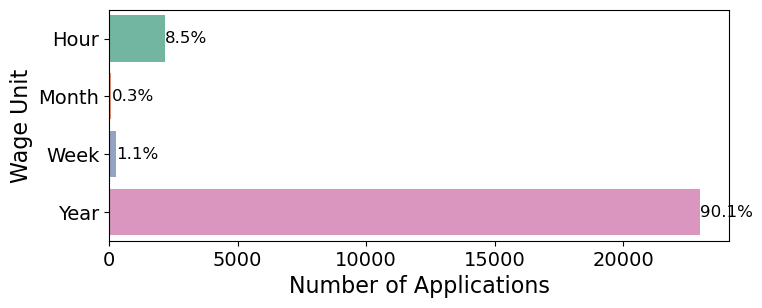

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="unit_of_wage",
    xlabel="Number of Applications",
    ylabel="Wage Unit",
    perc=True,
)

##### Observations
- The dominant majority (90%) of the applications are for the jobs whose prevailing wages are computed per year.

#### Case Status

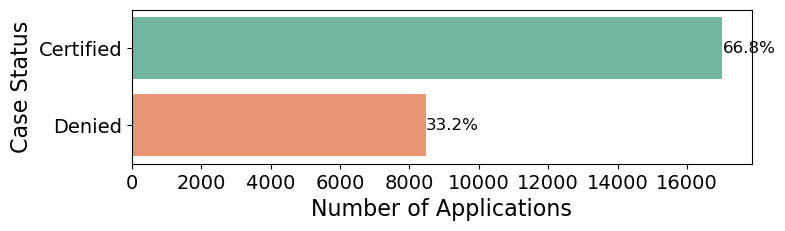

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="case_status",
    xlabel="Number of Applications",
    ylabel="Case Status",
    perc=True,
)

##### Observations
- Almost two-thirds of the visa applications are certified.

#### Number of Employees

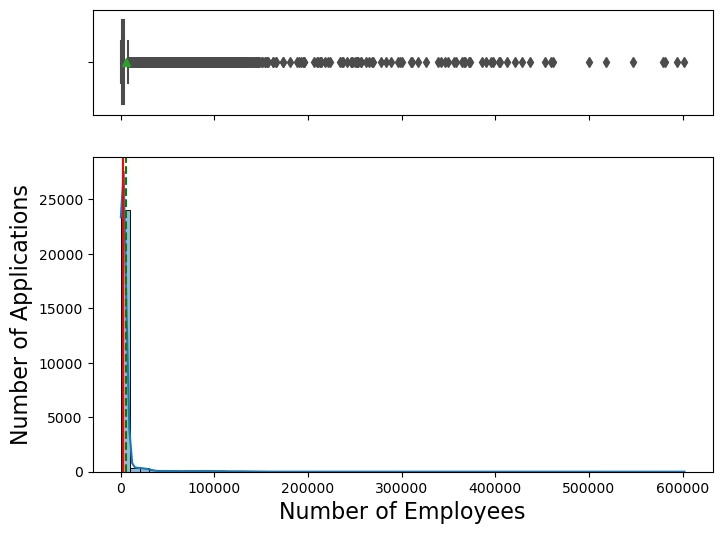

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df_0,
    feature="no_of_employees",
    xlabel="Number of Employees",
    ylabel="Number of Applications",
    kde=True,
    bins=60,
)

##### Observations
- There is a large variation in the number of employees of the employers.
- The distribution is highly right-skewed.
- Not all the detected outliers per 1.5-IQR rule shall be treated as outliers, because, in 2016, there existed employers in the United States that actually had hundreds of thousands of employees. Here, per the shown distribution, a cut-off value of 450000 is considered for the number of employees.

# b) Bivariate Analysis
Since the ultimate goal of this project is producing models to predict employment visa certification, the **focus** of the bivariate analyses will be on the effects of different independent variables on the target variable, i.e., `case_status`.

#### User-Defined Functions for Bivariate Plots

In [ ]:
# User-defined function to plot a stacked barplot
def stacked_barplot(data, predictor, target, xlabel, ylabel):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    xlabel: label of x-axis
    ylabel: label of y-axis
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 2, 4))

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()

<IPython.core.display.Javascript object>

In [ ]:
# User-defined function to plot distributions w.r.t. target
def distribution_plot_wrt_target(data, predictor, target, plabel, tlabel):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    plabel: label of predictor axes
    tlabel: label of target axes
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 0].set_title("Distribution of predictor for target = " + str(target_uniq[0]))
    axs[0, 0].set_xlabel(plabel, fontsize=16)
    axs[0, 0].set_ylabel("Density", fontsize=16)

    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of predictor for target = " + str(target_uniq[1]))
    axs[0, 1].set_xlabel(plabel, fontsize=16)
    axs[0, 1].set_ylabel("Density", fontsize=16)

    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_title("Boxplot w.r.t target")
    axs[1, 0].set_xlabel(tlabel, fontsize=16)
    axs[1, 0].set_ylabel(plabel, fontsize=16)

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    axs[1, 1].set_xlabel(tlabel, fontsize=16)
    axs[1, 1].set_ylabel(plabel, fontsize=16)

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

#### Case Status vs. Continent of Origin


case_status    Certified  Denied    All

continent                              

All                17018    8462  25480

Asia               11012    5849  16861

North America       2037    1255   3292

Europe              2957     775   3732

South America        493     359    852

Africa               397     154    551

Oceania              122      70    192

------------------------------------------------------------------------------------------------------------------------


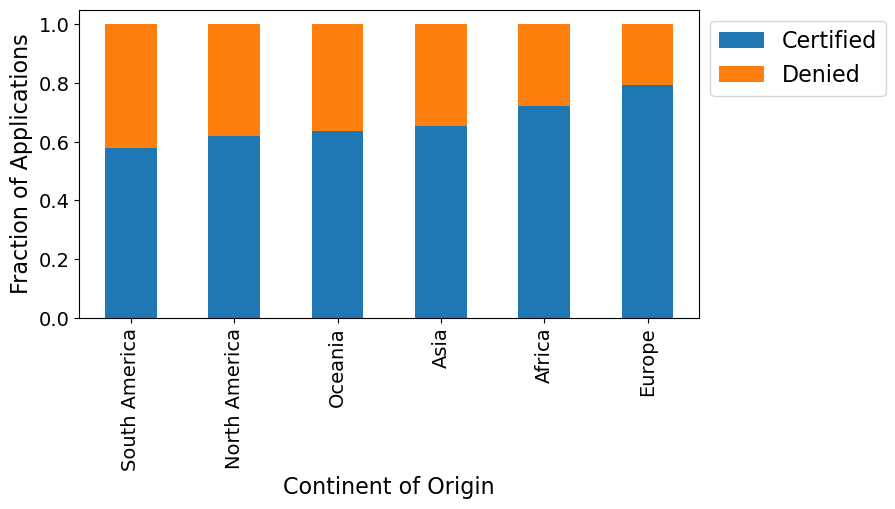

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs continent of origin
stacked_barplot(
    data=df_0,
    predictor="continent",
    target="case_status",
    xlabel="Continent of Origin",
    ylabel="Fraction of Applications",
)

##### Observations
- Among different continents, *Europe* has the highest work visa certification rate (79%).
- The lowest work visa certification rate belongs to *South America* (58%).

#### Case Status vs. Education Level


case_status            Certified  Denied    All

education_of_employee                          

All                        17018    8462  25480

Bachelor's                  6367    3867  10234

High School                 1164    2256   3420

Master's                    7575    2059   9634

Doctorate                   1912     280   2192

------------------------------------------------------------------------------------------------------------------------


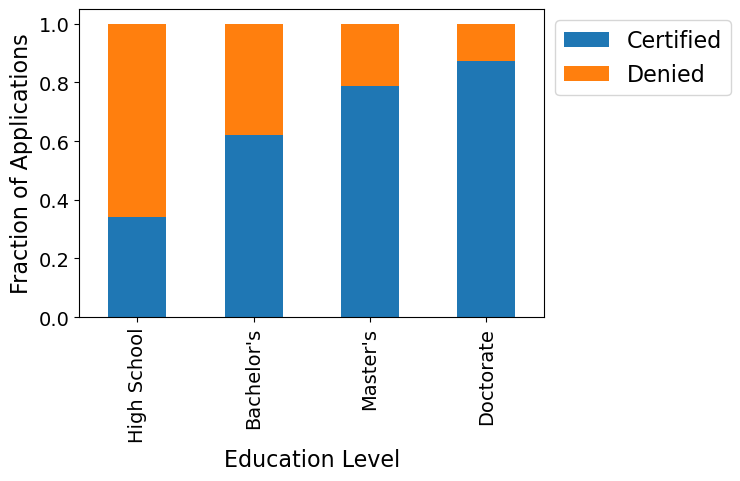

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs education level
stacked_barplot(
    data=df_0,
    predictor="education_of_employee",
    target="case_status",
    xlabel="Education Level",
    ylabel="Fraction of Applications",
)

##### Observations
- It is clear that the higher the education level of an applicants is, the more their chances of visa certification are.
- More specifically, while the visa certification likelihood of the applicants of a *doctorate* degree is 87%, this likelihood is only 34% for the applicants of *high school* education.

#### Case Status vs. Job Experience


case_status         Certified  Denied    All

has_job_experience                          

All                     17018    8462  25480

N                        5994    4684  10678

Y                       11024    3778  14802

------------------------------------------------------------------------------------------------------------------------


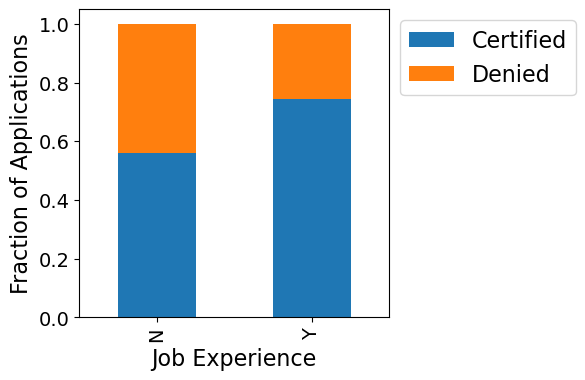

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs job experience
stacked_barplot(
    data=df_0,
    predictor="has_job_experience",
    target="case_status",
    xlabel="Job Experience",
    ylabel="Fraction of Applications",
)

##### Observations
- Having job experience is found to have a positive effect on the visa certification likelihood.
- More specifically, about 74% of the experienced applicants are granted visas, while this percentages is only 56% for the inexperienced applicants.

#### Case Status vs. Job Training Requirement

case_status            Certified  Denied    All

requires_job_training                          

All                        17018    8462  25480

N                          15012    7513  22525

Y                           2006     949   2955

------------------------------------------------------------------------------------------------------------------------


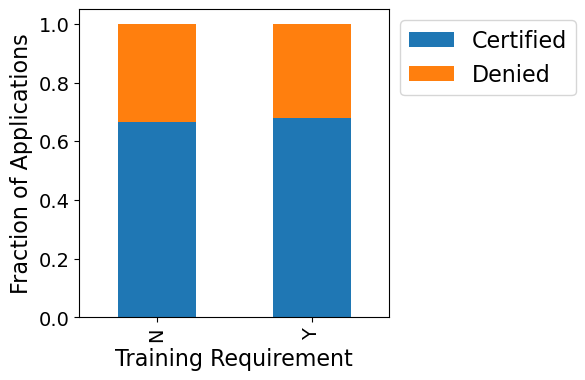

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs training requirement
stacked_barplot(
    data=df_0,
    predictor="requires_job_training",
    target="case_status",
    xlabel="Training Requirement",
    ylabel="Fraction of Applications",
)

##### Observations
- The visa certification likelihood is found nearly unaffected by the job training requirement.

#### Case Status vs. Employer Region

case_status           Certified  Denied    All

region_of_employment                          

All                       17018    8462  25480

Northeast                  4526    2669   7195

West                       4100    2486   6586

South                      4913    2104   7017

Midwest                    3253    1054   4307

Island                      226     149    375

------------------------------------------------------------------------------------------------------------------------


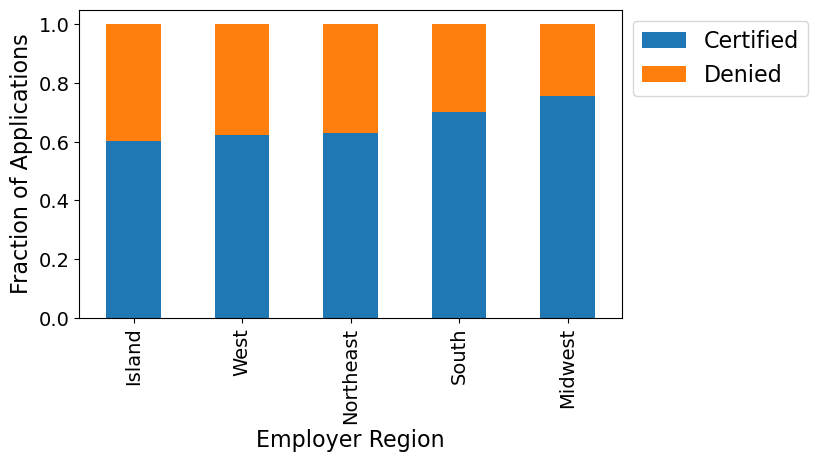

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs employer region
stacked_barplot(
    data=df_0,
    predictor="region_of_employment",
    target="case_status",
    xlabel="Employer Region",
    ylabel="Fraction of Applications",
)

##### Observations
- It appears that the visa applications filed by the employers within the *Midwest* region have the highest probability (~76%) of certification.
- The employers located in the *Northeast*, *West*, and *Island* regions have lower chances (60-63%) of visa certification.

#### Case Status vs. Position Type

case_status         Certified  Denied    All

full_time_position                          

All                     17018    8462  25480

Y                       15163    7610  22773

N                        1855     852   2707

------------------------------------------------------------------------------------------------------------------------


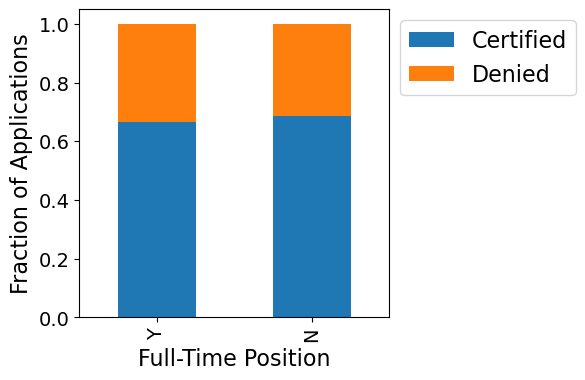

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs position type
stacked_barplot(
    data=df_0,
    predictor="full_time_position",
    target="case_status",
    xlabel="Full-Time Position",
    ylabel="Fraction of Applications",
)

##### Observations
- Visa certification seems to be unaffected by whether a position is full-time or part-time.

#### Case Status vs. Wage Unit
*Leading Question:* In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All

unit_of_wage                          

All               17018    8462  25480

Year              16047    6915  22962

Hour                747    1410   2157

Week                169     103    272

Month                55      34     89

------------------------------------------------------------------------------------------------------------------------


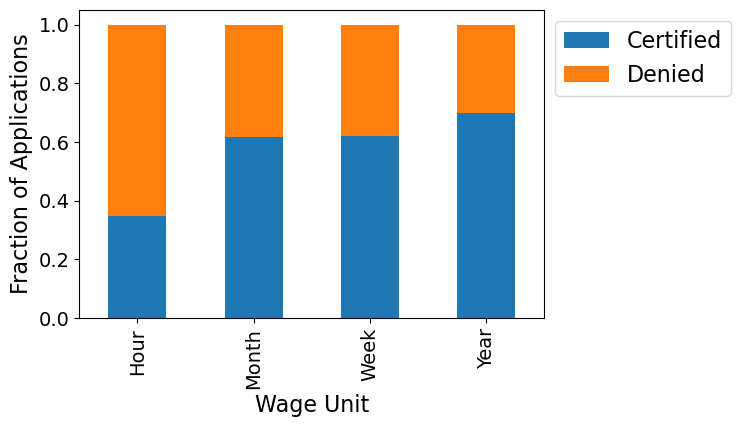

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs unit of prevailing wage
stacked_barplot(
    data=df_0,
    predictor="unit_of_wage",
    target="case_status",
    xlabel="Wage Unit",
    ylabel="Fraction of Applications",
)

##### Observations
- Those applicants whose wage unit is *year* are more likely than other applicants to be certified for a visa (~70% likelihood).
- The applicants who are paid by hour are the least likely to be certified for a visa (~35% likelihood). This could be predicted, because hourly jobs are usually less important for the growth of the United States and they could be done by normal American workers.

#### Case Status vs. Number of Employees

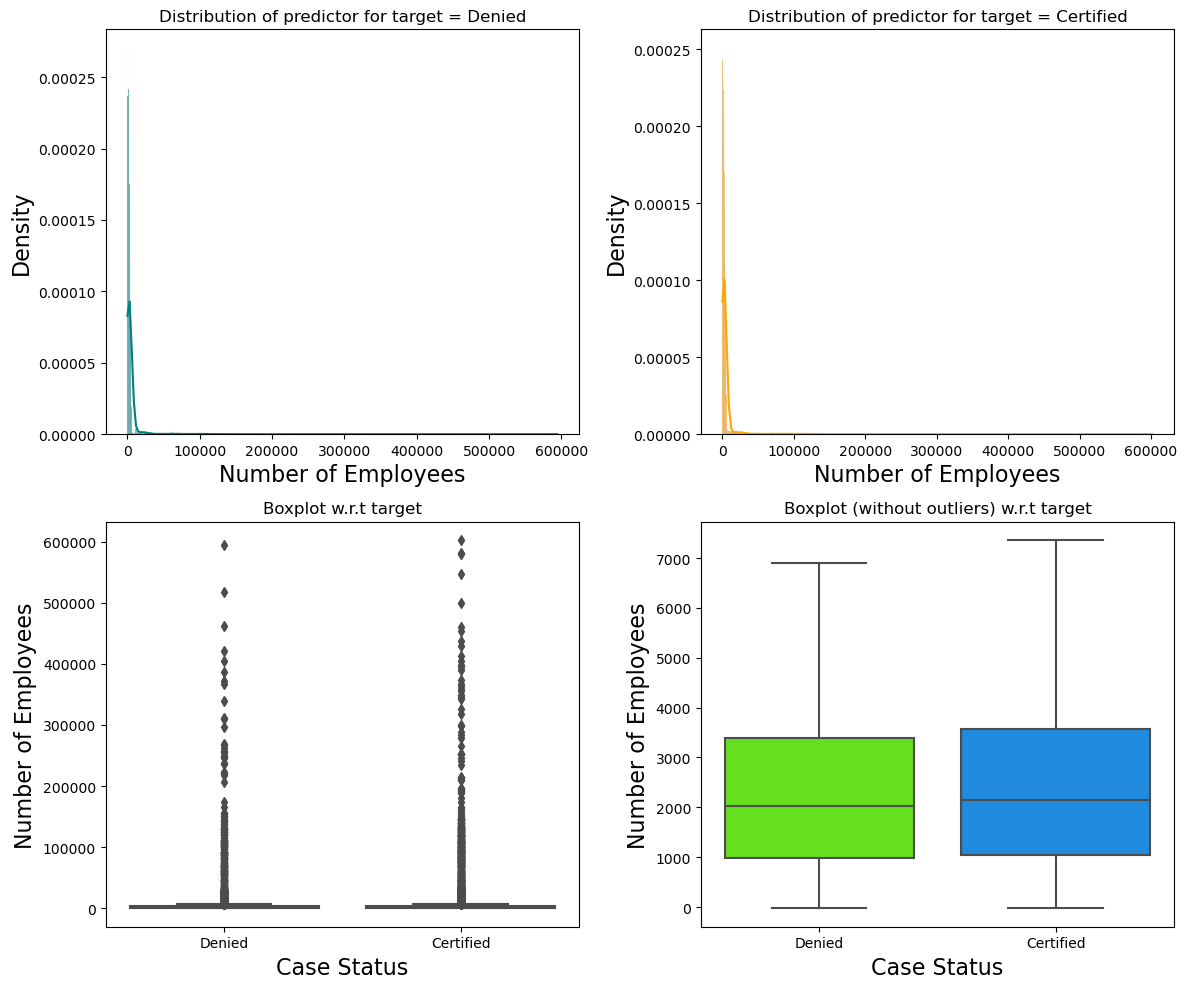

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function distribution_plot_wrt_target() to examine case certification likelihoods across data categories
distribution_plot_wrt_target(
    data=df_0,
    predictor="no_of_employees",
    target="case_status",
    plabel="Number of Employees",
    tlabel="Case Status",
)

##### Observations
- A very small difference is observed between the distributions of the employer's number of employees for those applications that are denied and those that are certified. As a result, it seems that the number of employees has insignificant effect on the likelihood of visa certification.

#### Training Requirement vs. Job Experience

Text(0.5, 14.722222222222216, 'Training Requirement')

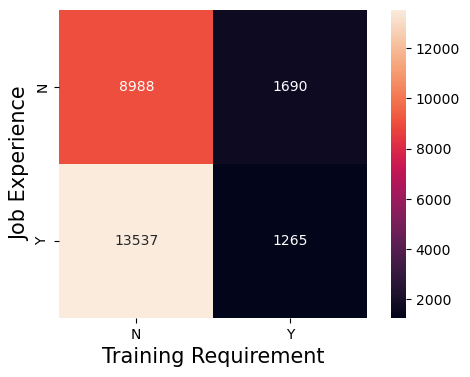

<IPython.core.display.Javascript object>

In [ ]:
# Use seaborn heatmap to compare number of applications pivoted on job experience and training requirement

# Create a count pivot table with respect to columns has_job_experience and requires_job_training
pt = df_0.pivot_table(
    values="case_status",
    index="has_job_experience",
    columns="requires_job_training",
    aggfunc="count",
)

# Plot a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pt, square=True, annot=True, fmt="g")
plt.ylabel("Job Experience", fontsize=15)
plt.xlabel("Training Requirement", fontsize=15)

##### Observations
- Reasonably, a higher percentage of the applicants who have no job experience require job training than the applicants who have job experience (16% vs. ~9%).

#### Job Training Requirement vs. Continent

requires_job_training      N     Y    All

continent                                

All                    22525  2955  25480

Asia                   15113  1748  16861

Europe                  2993   739   3732

North America           3044   248   3292

South America            702   150    852

Africa                   510    41    551

Oceania                  163    29    192

------------------------------------------------------------------------------------------------------------------------


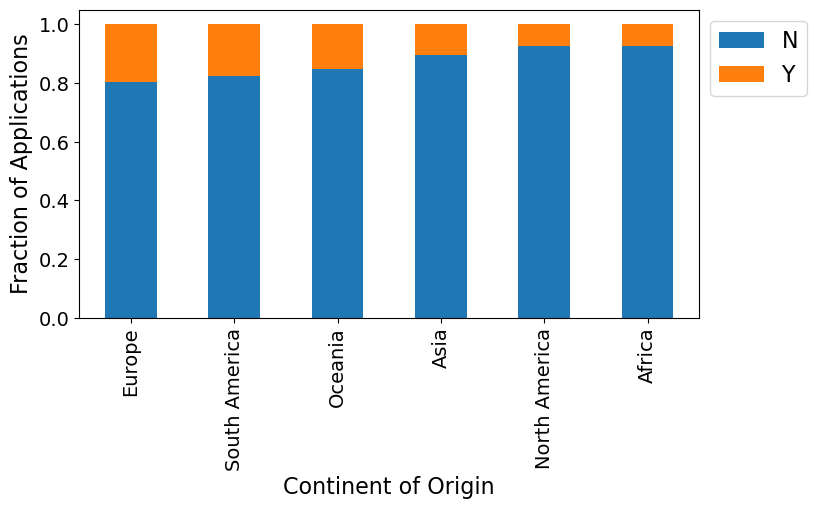

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function stacked_barplot() to examine job training requirement vs continent of origin of applicants
stacked_barplot(
    data=df_0,
    predictor="continent",
    target="requires_job_training",
    xlabel="Continent of Origin",
    ylabel="Fraction of Applications",
)

##### Observations
- Among the applicants from different continents, a smaller ratio of those from *Africa* and *North America* need training than those from other continents.
- The highest ratio of the applicants who need training belongs to those from *Europe*.

# Data Preprocessing

In [ ]:
# Create a copy of data frame before preprocessing
df_1 = df_0.copy()

<IPython.core.display.Javascript object>

# a) Treatment of Missing Values
Based on the initial evaluations, no values were missing in any of the columns. However, there were rows with unrealistic non-positive (<0) values of `no_of_employees`. To address this problem, these values are replaced with the median of `no_of_employees`.

In [ ]:
# Identify rows with non-positive no_of_employees
neg_employee_no_rows = df_1.no_of_employees <= 0

# Print number of rows with non-positive no_of_employees
print(
    f"There are {neg_employee_no_rows.sum()} rows with non-positive number of employees."
)

# Replace negative values in column no_of_employees with its median
df_1.loc[neg_employee_no_rows, "no_of_employees"] = df_1.no_of_employees.median()

# Double-check minimum value of no_of_employees
print(f"The new minimum number of employees is {df_1.no_of_employees.min()}.")

There are 33 rows with non-positive number of employees.

The new minimum number of employees is 12.


<IPython.core.display.Javascript object>

# b) Feature Engineering
The feature `yr_of_estab` is converted to `yrs_snc_estab`, containing the years since establishment. Also, to make the prevailing wages (in the column `prevailing_wage`) interpretable across the rows, they are all transformed into an *equivalent* hourly wage and are saved in a new column, `hourly_wage`. The columns `yr_of_estab` and `prevailing_wage` are dropped subsequently.

In [ ]:
# Add a new column, yrs_snc_estab, including years since establishment - final year is 2016, when data is gathered
df_1["yrs_snc_estab"] = 2016 - df_1.yr_of_estab

# Drom yr_of_estab
df_1.drop("yr_of_estab", axis=1, inplace=True)

# Create a column including equivalent hourly wages - it is assumed that:
# A year includes 2080 work-hours
# A month includes 173 work-hours
# A week includes 40 work-hours
df_1["hourly_wage"] = df_1["prevailing_wage"]
df_1.loc[df_1.unit_of_wage == "Year", "hourly_wage"] = (
    df_1.loc[df_1.unit_of_wage == "Year", "hourly_wage"] / 2080.0
)
df_1.loc[df_1.unit_of_wage == "Month", "hourly_wage"] = (
    df_1.loc[df_1.unit_of_wage == "Month", "hourly_wage"] / 173.0
)
df_1.loc[df_1.unit_of_wage == "Week", "hourly_wage"] = (
    df_1.loc[df_1.unit_of_wage == "Week", "hourly_wage"] / 40.0
)

# Drom yr_of_estab
df_1.drop("prevailing_wage", axis=1, inplace=True)

# Check sample rows of updated data
df_1.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_snc_estab,hourly_wage
17639,Asia,Bachelor's,Y,N,567,Midwest,Year,Y,Certified,24,12.905245
23951,Oceania,Bachelor's,N,N,619,Midwest,Year,Y,Certified,78,31.932683
8625,Asia,Master's,N,N,2635,South,Hour,Y,Certified,11,887.292100
20206,Asia,Bachelor's,Y,Y,3184,Northeast,Year,Y,Certified,30,23.767212
7471,Europe,Bachelor's,Y,N,4681,West,Year,Y,Denied,88,23.973649
3433,Asia,Bachelor's,Y,N,222,South,Hour,Y,Certified,27,813.726100
24440,Europe,High School,N,Y,3278,South,Year,Y,Denied,22,98.532880
12104,Asia,Master's,Y,N,1359,West,Year,N,Certified,19,97.229346
15656,Asia,Bachelor's,N,N,2081,West,Year,Y,Denied,13,53.708183
23110,North America,Bachelor's,Y,N,854,Northeast,Hour,Y,Denied,18,444.825700


<IPython.core.display.Javascript object>

In [ ]:
# Check statistical summary of numeric data in updated data
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5669.797645,22877.372247,12.000000,1028.00000,2109.000000,3504.000000,602069.00000
yrs_snc_estab,25480.0,36.590071,42.366929,0.000000,11.00000,19.000000,40.000000,216.00000
hourly_wage,25480.0,94.902995,278.176919,0.048077,22.64806,39.826663,60.012036,7004.39875


<IPython.core.display.Javascript object>

##### Observations
- The mean and median values of `yrs_snc_estab` are ~37 and 19 years, respectively. The oldest employer was established 216 years before the data collection.
- The minimum and maximum values of `hourly_wage` are 0.05 and ~7004 (probably in dollars), respectively, so the variation of this variable is very large. The mean hourly wage is ~95.

# c) Detection and Treatment of Outliers
#### Detection of Outliers
Initially, the 1.5-IQR rule is used to detect *potential* outliers. However, it is noted that all the values detected as outlier by this method are not always outliers.

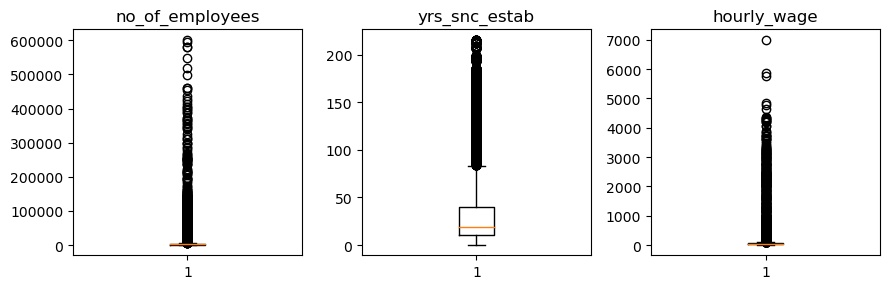

<IPython.core.display.Javascript object>

In [ ]:
# Create a list of column names including numeric data
num_cols = df_1.select_dtypes(include=np.number).columns.tolist()

# Use boxplots with 1.5*IQR whiskers for each numeric variable to detect potential outliers
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df_1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##### Observations
- Given the discussions provided in the initial EDA section, not all the outliers detected based on the 1.5-IQR rule are actual outliers. Here, merely to remove very large infrequent values, the following maximum cut-off values are considered for the above three variables:
    - `no_of_employees`: 450000
    - `yrs_snc_estab`: 200
    - `hourly_wage`: 4000

#### Treatment of Outliers
- The detected upper outliers are replaced with the maximum values of the respective columns in the absence of the outliers.

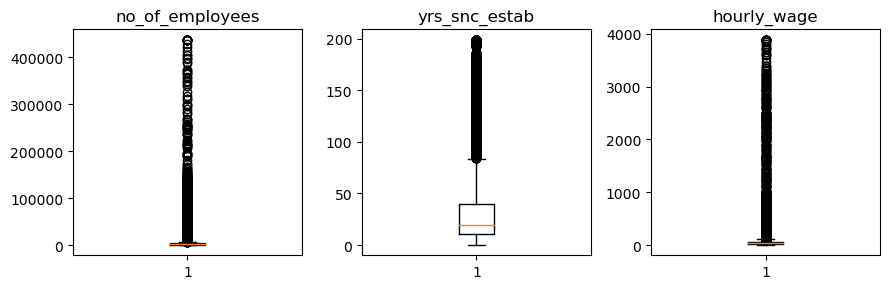

<IPython.core.display.Javascript object>

In [ ]:
# Replace outliers in no_of_employees
df_1.loc[df_1.no_of_employees > 450000, "no_of_employees"] = df_1[
    df_1.no_of_employees <= 450000
].no_of_employees.max()

# Replace outliers in yrs_snc_estab
df_1.loc[df_1.yrs_snc_estab > 200, "yrs_snc_estab"] = df_1[
    df_1.yrs_snc_estab <= 200
].yrs_snc_estab.max()

# Replace outliers in hourly_wage
df_1.loc[df_1.hourly_wage > 4000, "hourly_wage"] = df_1[
    df_1.hourly_wage <= 4000
].hourly_wage.max()

# Use boxplots to check distributions again
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df_1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Secondary EDA
The focus of the secondary EDA is on the new variables created in the section Data Preprocessing, while correlation coefficients between the final numeric variables are also examined.

### Univariate Analysis

#### Years Since Establishment

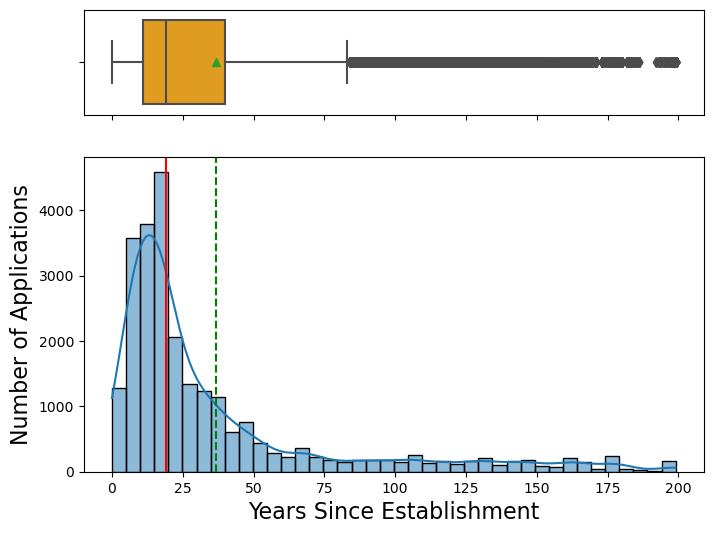

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df_1,
    feature="yrs_snc_estab",
    xlabel="Years Since Establishment",
    ylabel="Number of Applications",
    kde=True,
    bins=40,
)

##### Observations
- The distribution is quite right-skewed and the majority of the employers are less than 40 years old.
- As mentioned in the previous section on the treatment of outliers, the detected outliers per 1.5-IQR rule are not actually outliers.

#### Hourly Wage

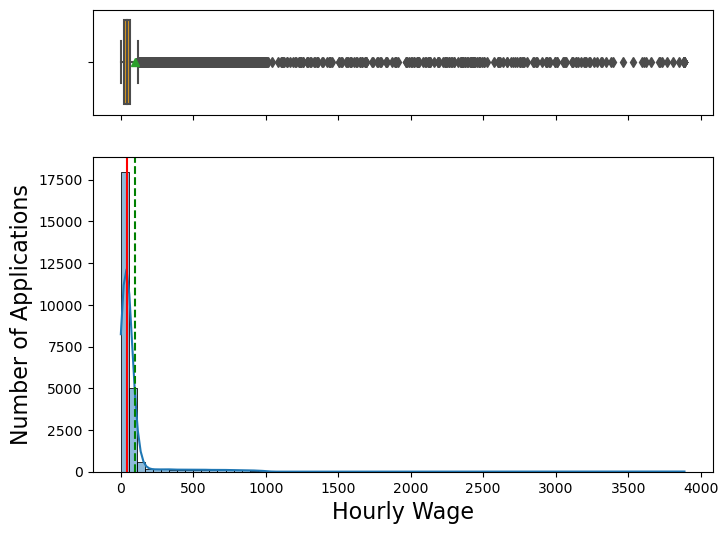

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df_1,
    feature="hourly_wage",
    xlabel="Hourly Wage",
    ylabel="Number of Applications",
    kde=True,
    bins=70,
)

##### Observations
- The distribution of the computed equivalent hourly wage is highly right-skewed and the majority of the applications are for the positions with less than 100 (dollars) of equivalent hourly wage.
- Since there are certain positions in certain industries that are paid millions of dollars per year, the detected outliers are not actual outliers.

### Bivariate Analysis

#### Linear Correlation Coefficients
The linear correlation coefficients are only determined between the numeric variables, i.e., `no_of_employees`, `yrs_snc_estab`, and `hourly_wage`.

Text(0.5, 1.0, 'Correlation Coefficients')

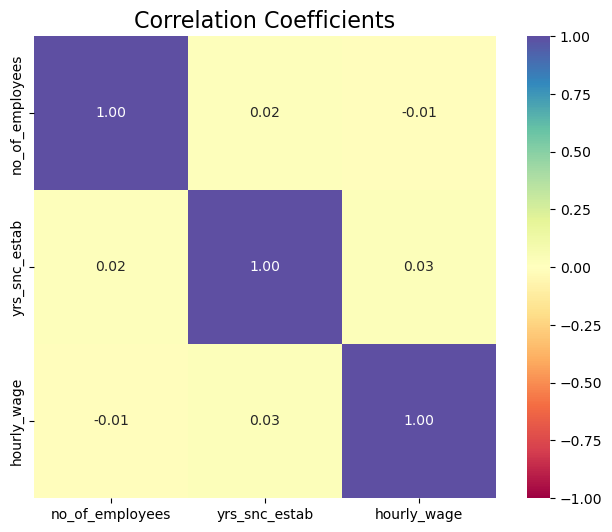

<IPython.core.display.Javascript object>

In [ ]:
# Create a list of column names including numeric data
num_cols = df_1.select_dtypes(include=np.number).columns.tolist()

# Compute correlation coefficients
rhos = df_1[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))  # set figure size

p = sns.heatmap(
    rhos,
    annot=True,
    square=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)  # create heatmap

p.set_title("Correlation Coefficients", fontsize=16)
# set chart's title

##### Observations
- Negligible linear correlation is observed between the numeric variables.

#### Pairplot

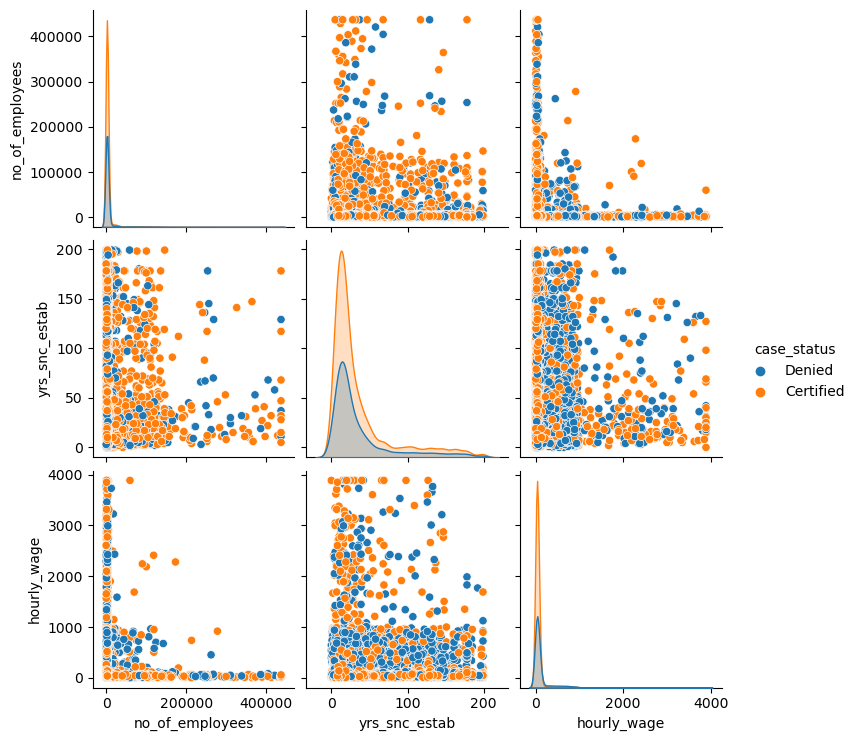

<IPython.core.display.Javascript object>

In [ ]:
# Add case_status to list of column names including numeric data
num_cols = num_cols + ["case_status"]

# Create a pairplot to see distributions of and relationships between variations of numeric data
sns.pairplot(data=df_1[num_cols], hue="case_status", diag_kind="kde", aspect=1)

##### Observations
- No linear correlation is observed between the numeric variables.
- It is hard to identify the effects of the above variables on the visa certification likelihood.

#### Case Status vs. Hourly Wage


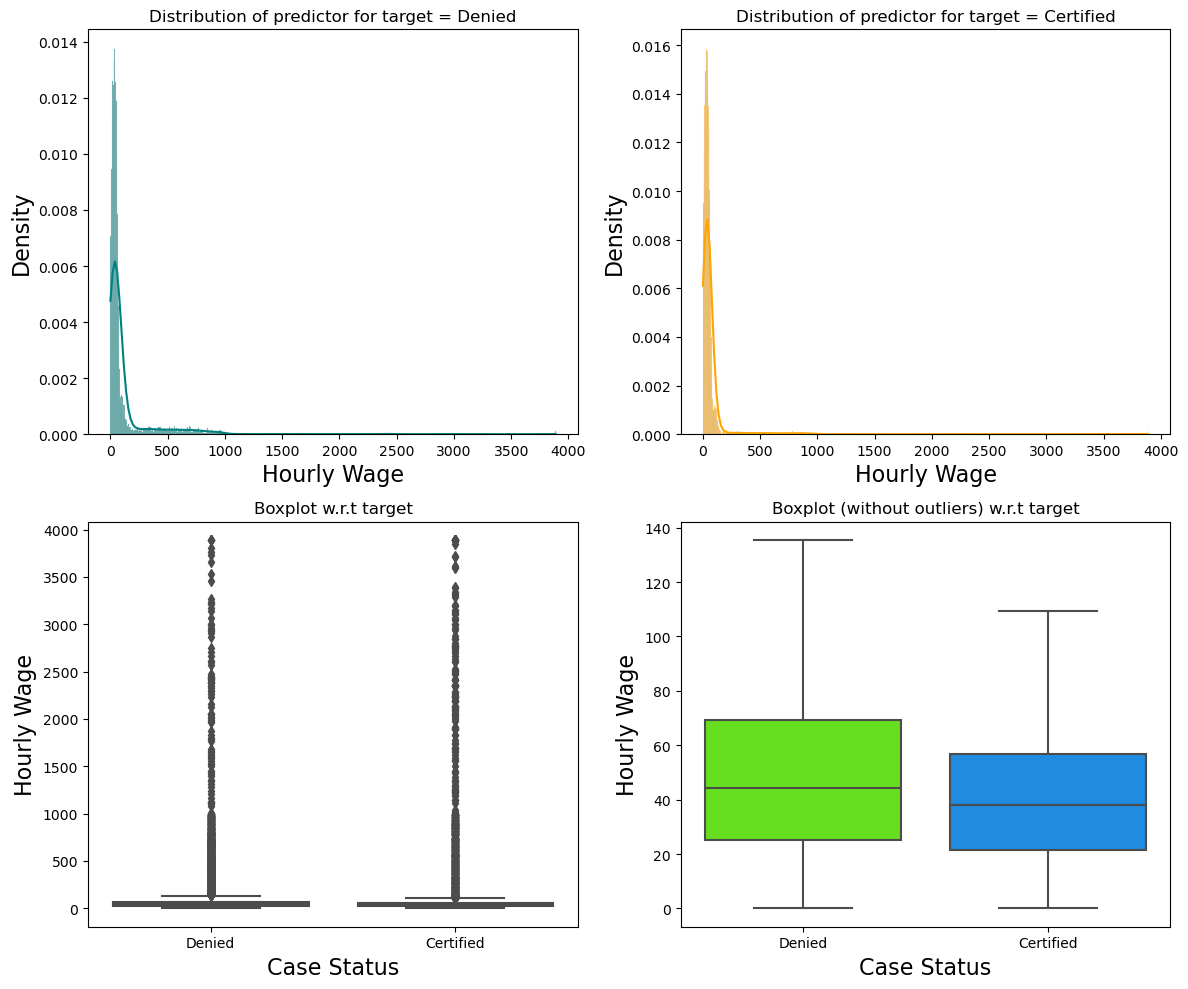

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function distribution_plot_wrt_target() to examine case certification likelihoods across data categories
distribution_plot_wrt_target(
    data=df_1,
    predictor="hourly_wage",
    target="case_status",
    plabel="Hourly Wage",
    tlabel="Case Status",
)

##### Observations
- It appears that a decrease in the equivalent hourly wage would lead to an increase in the likelihood of visa certification. This could be justified by the fact that the jobs that are paid higher could be more easily filled by American workers, making the emplyment of aliens unjustifiable.

#### Hourly Wage vs. Education Level

(array([0, 1, 2, 3]),
 [Text(0, 0, 'High School'),
  Text(0, 1, "Master's"),
  Text(0, 2, "Bachelor's"),
  Text(0, 3, 'Doctorate')])

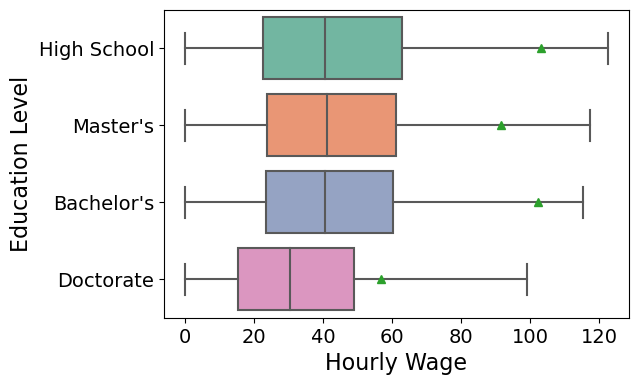

<IPython.core.display.Javascript object>

In [ ]:
# Use seaborn boxplot to compare distributions of hourly wage for different education levels without outliers
plt.figure(figsize=(6, 4))
# set figure size
sns.boxplot(
    data=df_1,
    y="education_of_employee",
    x="hourly_wage",
    showmeans=True,
    showfliers=False,
    palette="Set2",
)  # create box plot

# set axis labels
plt.xlabel("Hourly Wage", fontsize=16)
plt.ylabel("Education Level", fontsize=16)

# set font size for axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

##### Observations
- Surprisingly, on average, the employees of less education (e.g., high school and bachelor's degree) seem to be paid more in terms of equivalent hourly wage than the employees of higher education, particularly, those of a doctorate degree.

#### Hourly Wage vs. Job Experience

(array([0, 1]), [Text(0, 0, 'N'), Text(0, 1, 'Y')])

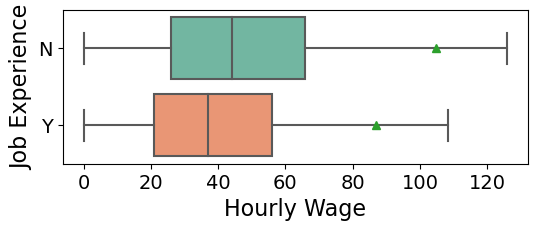

<IPython.core.display.Javascript object>

In [ ]:
# Use seaborn boxplot to compare distributions of hourly wage with respect to job experience
plt.figure(figsize=(6, 2))
# set figure size
sns.boxplot(
    data=df_1,
    y="has_job_experience",
    x="hourly_wage",
    showmeans=True,
    showfliers=False,
    palette="Set2",
)  # create box plot

# set axis labels
plt.xlabel("Hourly Wage", fontsize=16)
plt.ylabel("Job Experience", fontsize=16)

# set font size for axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

##### Observations
- Surprisingly, on average, those employees that have job experience seem to receive lower equivalent hourly wage than those who have no job experience.

#### Hourly Wage vs. Job Training

(array([0, 1]), [Text(0, 0, 'N'), Text(0, 1, 'Y')])

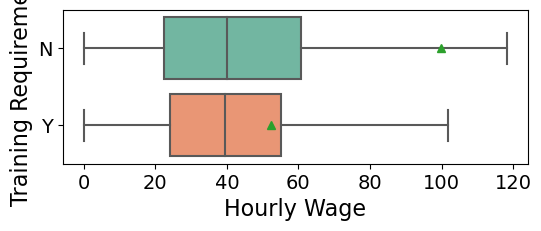

<IPython.core.display.Javascript object>

In [ ]:
# Use seaborn boxplot to compare distributions of hourly wage with respect to job training requirement
plt.figure(figsize=(6, 2))
# set figure size
sns.boxplot(
    data=df_1,
    y="requires_job_training",
    x="hourly_wage",
    showmeans=True,
    showfliers=False,
    palette="Set2",
)  # create box plot

# set axis labels
plt.xlabel("Hourly Wage", fontsize=16)
plt.ylabel("Training Requirement", fontsize=16)

# set font size for axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

##### Observations
- On average, the equivalent hourly wage of the applicants who do not require training is higher than those who require training.

#### Case Status vs. Years Since Establishment

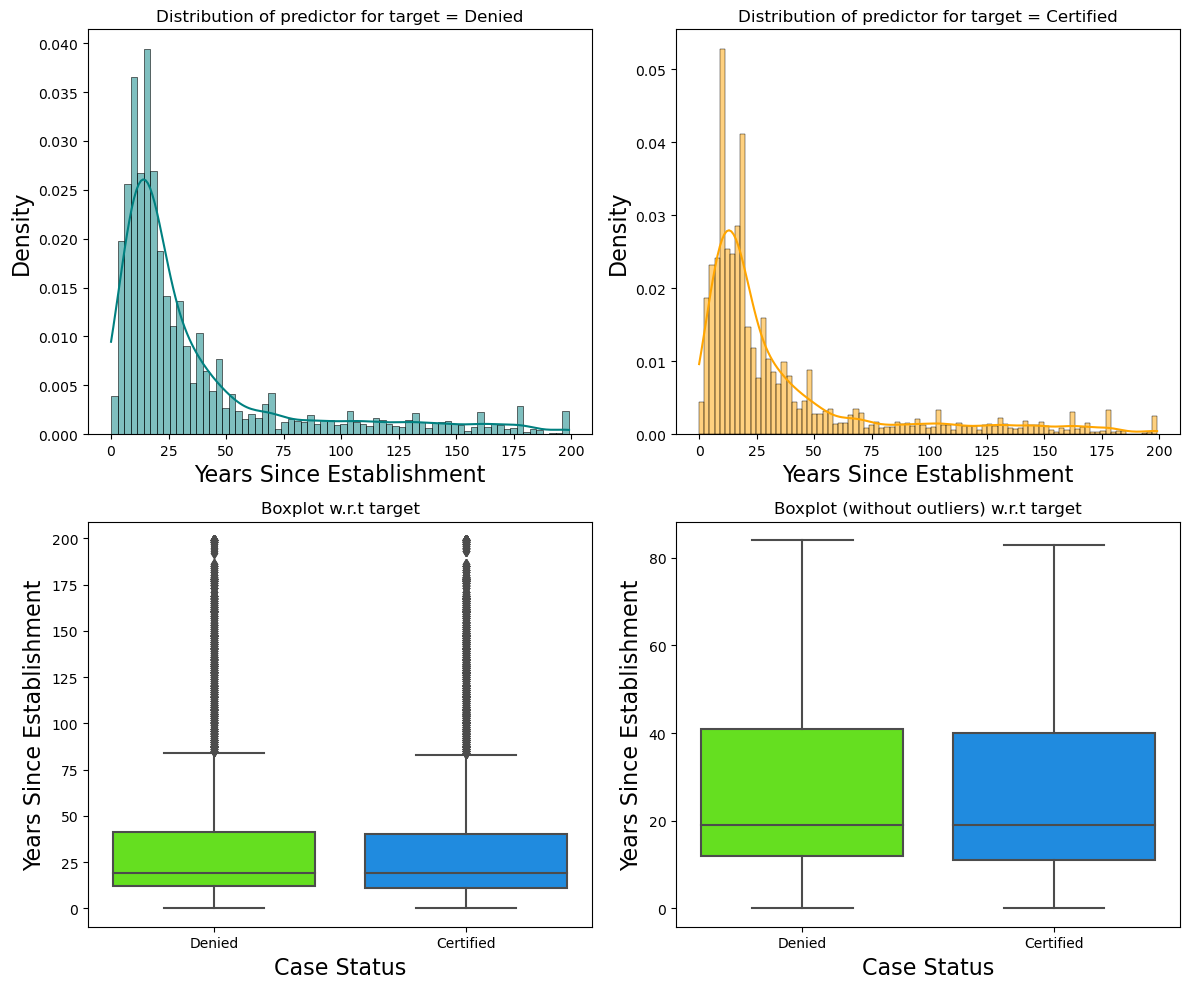

<IPython.core.display.Javascript object>

In [ ]:
# Use user-defined function distribution_plot_wrt_target() to examine case certification likelihoods across data categories
distribution_plot_wrt_target(
    data=df_1,
    predictor="yrs_snc_estab",
    target="case_status",
    plabel="Years Since Establishment",
    tlabel="Case Status",
)

##### Observations
- A very small difference is observed between the distributions of the employer's age for those applications that are denied and those that are certified. As a result, it seems that the number of years since establishment has insignificant effect on the likelihood of visa certification.

#### Number of Employees vs. Years Since Establishment

Text(37.597222222222214, 0.5, 'Number of Employees')

<Figure size 400x400 with 0 Axes>

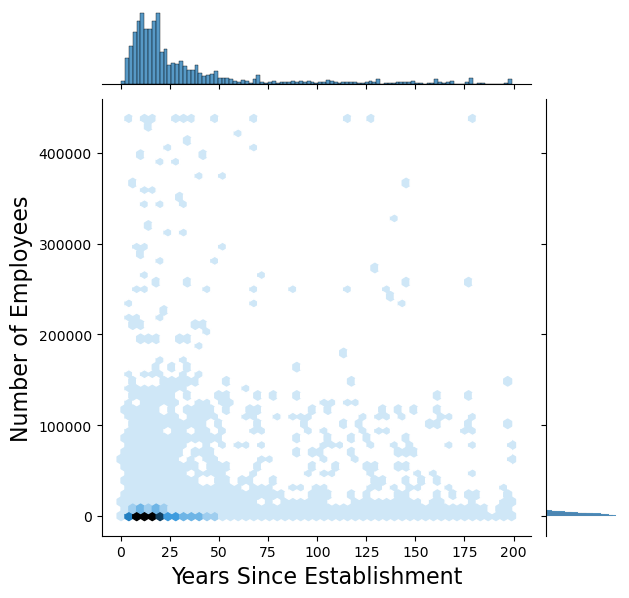

<IPython.core.display.Javascript object>

In [ ]:
# Use seaborn jointplot to compare distributions of number of employees vs years since employer's establishment
plt.figure(figsize=(4, 4))
# set figure size
sns.jointplot(data=df_1, x="yrs_snc_estab", y="no_of_employees", kind="hex", bins=10)
# create joint plot

plt.xlabel("Years Since Establishment", fontsize=16)
# set x-axis label
plt.ylabel("Number of Employees", fontsize=16)
# set y-axis label

##### Observations
- Older employers seem to tend to have slightly smaller number of employees compared to the younger employers.

# Data Preparation for Modeling

# a) Encoding Categorical Data
Encoding the values in the columns `has_job_experience`, `requires_job_training`, `full_time_position`, `case_status` and `education_of_employee`.

In [ ]:
# has_job_experience, requires_job_training, and full_time_position:
# Replace 'Y' with 1 and 'N' with 0
df_1.has_job_experience = df_1.has_job_experience.apply(lambda x: 1 if x == "Y" else 0)
df_1.requires_job_training = df_1.requires_job_training.apply(
    lambda x: 1 if x == "Y" else 0
)
df_1.full_time_position = df_1.full_time_position.apply(lambda x: 1 if x == "Y" else 0)

# case_status:
# Replace 'Certified' with 1 and 'Denied' with 0
df_1.case_status = df_1.case_status.apply(lambda x: 1 if x == "Certified" else 0)

# education_of_employee:
# Replace 'High School' with 1, 'Bachelor's' with 2, 'Master's' with 3, and 'Doctarate' with 4
df_1.education_of_employee = df_1.education_of_employee.apply(
    lambda x: 1
    if x == "High School"
    else (2 if x == "Bachelor's" else (3 if x == "Master's" else 4))
)

# Check updated sample rows
df_1.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_snc_estab,hourly_wage
17639,Asia,2,1,0,567,Midwest,Year,1,1,24,12.905245
23951,Oceania,2,0,0,619,Midwest,Year,1,1,78,31.932683
8625,Asia,3,0,0,2635,South,Hour,1,1,11,887.292100
20206,Asia,2,1,1,3184,Northeast,Year,1,1,30,23.767212
7471,Europe,2,1,0,4681,West,Year,1,0,88,23.973649
3433,Asia,2,1,0,222,South,Hour,1,1,27,813.726100
24440,Europe,1,0,1,3278,South,Year,1,0,22,98.532880
12104,Asia,3,1,0,1359,West,Year,0,1,19,97.229346
15656,Asia,2,0,0,2081,West,Year,1,0,13,53.708183
23110,North America,2,1,0,854,Northeast,Hour,1,0,18,444.825700


<IPython.core.display.Javascript object>

### Separation of Dependent and Independent Variables

In [ ]:
# Create a data frame with only independent variables
X = df_1.drop(["case_status"], axis=1)

# Create a series with only dependent variable
Y = df_1.case_status

# Print some rows of X and Y data frames to check them
print("Independent Variables\n", "=" * 80, "\n", X.sample(5, random_state=1))
print("\n\nDependent Variables\n", "=" * 80, "\n", Y.sample(5, random_state=1))

Independent Variables


       continent  education_of_employee  has_job_experience  \

17639      Asia                      2                   1   

23951   Oceania                      2                   0   

8625       Asia                      3                   0   

20206      Asia                      2                   1   

7471     Europe                      2                   1   



       requires_job_training  no_of_employees region_of_employment  \

17639                      0              567              Midwest   

23951                      0              619              Midwest   

8625                       0             2635                South   

20206                      1             3184            Northeast   

7471                       0             4681                 West   



      unit_of_wage  full_time_position  yrs_snc_estab  hourly_wage  

17639         Year                   1             24    12.905245  

23951         Year         

<IPython.core.display.Javascript object>

# b) Creating Dummy Variables
Create dummy variables for the categorical columns, i.e., `unit_of_wage`, `continent`, and `region_of_employment`.

In [ ]:
# Use pandas function get_dummies to create dummy variables and drop their first one
X = pd.get_dummies(X, drop_first=True)

# Check updated independent variables data frame
X.sample(5, random_state=1)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,full_time_position,yrs_snc_estab,hourly_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
17639,2,1,0,567,1,24,12.905245,1,0,0,0,0,1,0,0,0,0,0,1
23951,2,0,0,619,1,78,31.932683,0,0,0,1,0,1,0,0,0,0,0,1
8625,3,0,0,2635,1,11,887.292100,1,0,0,0,0,0,0,1,0,0,0,0
20206,2,1,1,3184,1,30,23.767212,1,0,0,0,0,0,1,0,0,0,0,1
7471,2,1,0,4681,1,88,23.973649,0,1,0,0,0,0,0,0,1,0,0,1


<IPython.core.display.Javascript object>

# c) Splitting Data into Training and Test Sets

In [ ]:
# Use function train_test_split to create training and testing data sets for both dependnet and independent variables
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)

# Check number of rows in each data set
print("Number of rows in training data set =", X_train.shape[0])
print("\nNumber of rows in test data set =", X_test.shape[0])

# Show percentage of number of rows in each data set
print("\nPercentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Number of rows in training data set = 17836



Number of rows in test data set = 7644



Percentage of classes in training set:

1    0.667919

0    0.332081

Name: case_status, dtype: float64



Percentage of classes in test set:

1    0.667844

0    0.332156

Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

# Building Prediction Models
# a) Evaluation Criterion
#### Possible Errors
- Prediction of visa certification while the visa will actually be denied, i.e., false positive.
- Prediction of visa denial while the visa will actually be certified, i.e., false negative.

#### More Important Error

A false positive would lead to the waste of the OFLC's time and staff resources, while a false negative would prevent a qualified applicant who could fill essential jobs in the United States from receiving work visa. Therefore, it appears that both errors could be equally important for the OFLC to be minimized.

#### Optimal Performance Measure

Given the foregoing, to minimize both the false positive and false negative errors simoltaneously, it is decided that ***F1-score*** could be the optimal performance measure for the models built subsequently. That is, the best model would maximize F1-score, while it would not be overfitting or underfitting the training data.

#### User-Defined Functions for Model Performance Evaluation

In [ ]:
# User-defined function to compute different performance metrics to evaluate a classification model built using sklearn
def get_metrics_score(model, flag=True):
    """
    model: classifier to predict values of Y
    """

    # Predict Y using independent variables
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Compute performance metrics
    train_acc = accuracy_score(Y_train, pred_train)  # accuracy
    test_acc = accuracy_score(Y_test, pred_test)

    train_recall = recall_score(Y_train, pred_train)  # recall
    test_recall = recall_score(Y_test, pred_test)

    train_precision = precision_score(Y_train, pred_train)  # precision
    test_precision = precision_score(Y_test, pred_test)

    train_f1 = f1_score(Y_train, pred_train)  # f1-score
    test_f1 = f1_score(Y_test, pred_test)

    # Create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [train_acc, test_acc],
            "Recall": [train_recall, test_recall],
            "Precision": [train_precision, test_precision],
            "F1": [train_f1, test_f1],
        },
        index=["Training", "Test"],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
# User-defined function to plot the confusion_matrix of a classification model built using sklearn based on test set
def make_confusion_matrix(model):
    """
    model: classifier to predict values of Y
    """
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.title("Test Set's Confusion Matrix", fontsize=16)
    plt.ylabel("Actual Label", fontsize=15)
    plt.xlabel("Predicted Label", fontsize=15)

<IPython.core.display.Javascript object>

# Decision Tree Classifier

In [ ]:
# Use function DecisionTreeClassifier from sklearn to build model - consider `gini` criterion to split data at nodes
dcsn_tree = DecisionTreeClassifier(criterion="gini", random_state=1)
dcsn_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,1.000000,1.000000,1.000000,1.000000
Test,0.652669,0.736729,0.741522,0.739118


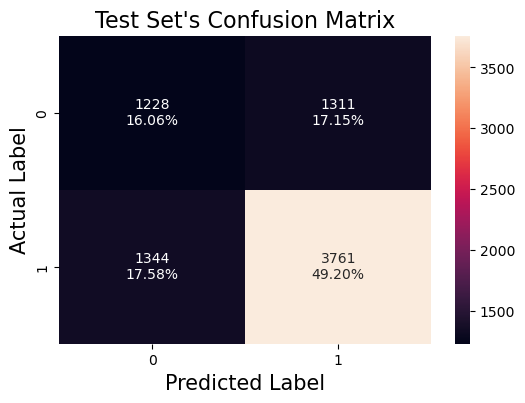

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(dcsn_tree)

# Check performance of model on both training and test data sets
perf_dcsn_tree = get_metrics_score(dcsn_tree)
perf_dcsn_tree

##### Observations
- The initial decision tree model works very well for the training data set - all performance metrics, i.e., accuracy , recall, precision, and F1-score are 1.00.
- However, the performance is not as good for the test set (F1-score is 0.74), implying overfitting. As a result, there is need for hyperparameter tuning through grid search.

### Decision Tree Classifier with Hyperparameter Tuning

In [ ]:
# Choose type of classifier
tnd_dcsn_tree = DecisionTreeClassifier(random_state=1)

# Form grid of parameters to search in
grid_para = {
    "class_weight": ["balanced", None],
    "max_depth": np.arange(2, 21, 2),
    "max_leaf_nodes": np.arange(2, 21, 2),
    "min_samples_split": [100, 200, 400, 800],
    "min_impurity_decrease": [0.0001, 0.001, 0.01],
}

# Set type of score used to evaluate performance throughout search
scorer = make_scorer(f1_score)

# Run GridSearch
grid_obj = GridSearchCV(tnd_dcsn_tree, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set classifer to best combination of parameters
tnd_dcsn_tree = grid_obj.best_estimator_

# Fit best decision tree to training data
tnd_dcsn_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=14,
                       min_impurity_decrease=0.0001, min_samples_split=100,
                       random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.737105,0.912784,0.748692,0.822635
Test,0.729853,0.911851,0.742424,0.818462


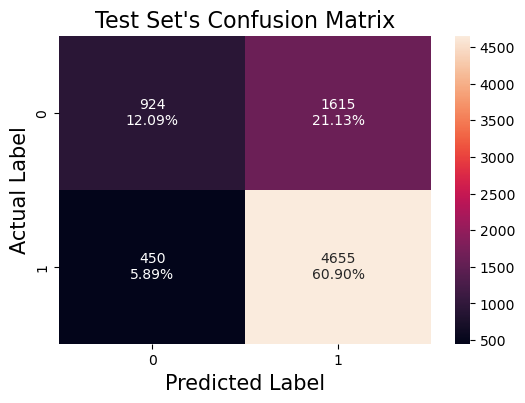

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(tnd_dcsn_tree)

# Check performance of model on both training and test data sets
perf_tnd_dcsn_tree = get_metrics_score(tnd_dcsn_tree)
perf_tnd_dcsn_tree

##### Observations
- The tuned decision tree model has a better overall performance than the initial decision tree model. Specifically, all its metrics are almost equal for both training and test data sets, indicating that the model is not overfitting anymore.
- The F1-score for the test set has been increased from 0.74 for the initial model to 0.82 for the tuned model.

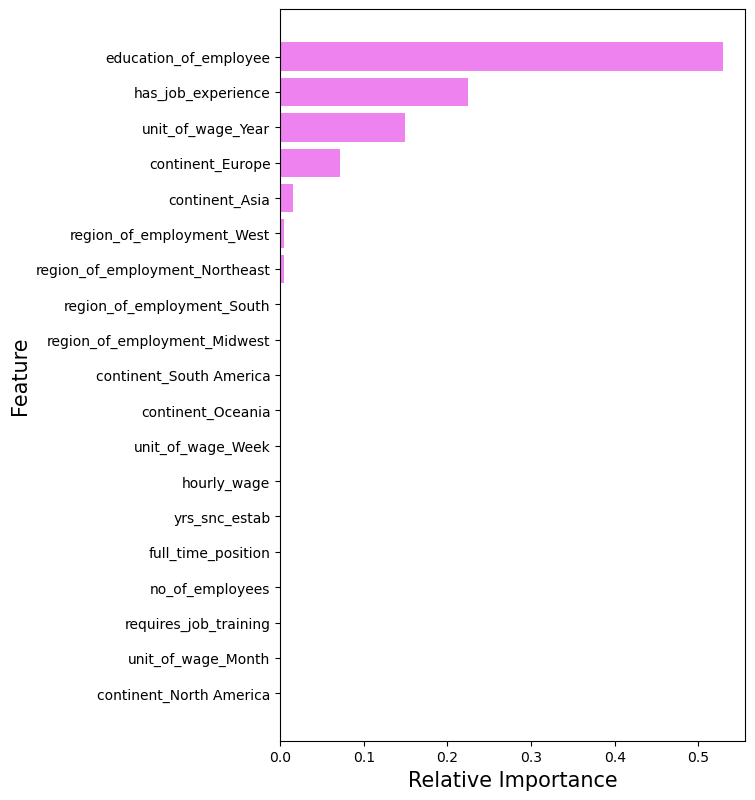

<IPython.core.display.Javascript object>

In [ ]:
# Create a list of column names - features of tree
col_names = list(X.columns)

# Check importances of various features of tuned tree
importances = tnd_dcsn_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 0.5 * len(col_names)))
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [col_names[i] for i in indices])
plt.xlabel("Relative Importance", fontsize=15)
plt.ylabel("Feature", fontsize=15)
plt.show()

##### Observations
- The top four independent variables of importance in the tuned decision tree model are `education_of_employee`, `has_job_experience`, `unit_of_wage_Year`, and `continent_Europe`.

# Bagging Classifier

In [ ]:
# Use function BaggingClassifier from sklearn to build model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, Y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.984077,0.985562,0.990551,0.98805
Test,0.690345,0.770813,0.766758,0.76878


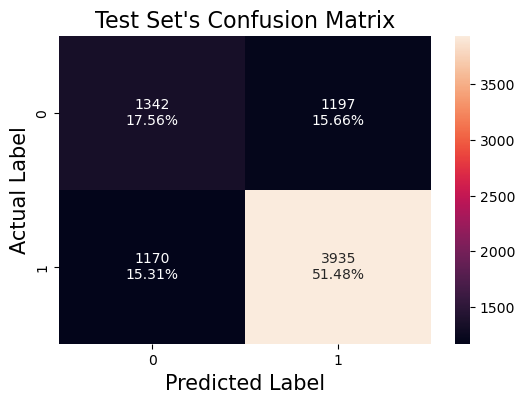

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(bagging)

# Check performance of model on both training and test data sets
perf_bagging = get_metrics_score(bagging)
perf_bagging

##### Observations
- Compared to the initial decision tree model (not tuned), this model has slightly better performance on the test data set.
- However, considering the very high performance metrics for the training data set, it is clear that the model is overfitting and needs hyperparameter tuning.

### Bagging Classifier with Hyperparameter Tuning

In [ ]:
# Choose type of classifier
tnd_bagging = BaggingClassifier(random_state=1)

# Form grid of parameters to search in
grid_para = {
    "max_samples": [0.7, 0.8, 0.9, 1.0],
    "max_features": [0.7, 0.8, 0.9, 1.0],
    "n_estimators": np.arange(20, 101, 20),
}

# Set type of score used to evaluate performance throughout search
scorer = make_scorer(f1_score)

# Run GridSearch
grid_obj = GridSearchCV(tnd_bagging, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set classifer to best combination of parameters
tnd_bagging = grid_obj.best_estimator_

# Fit best decision tree to training data
tnd_bagging.fit(X_train, Y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=60,
                  random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.984806,0.998405,0.979252,0.988736
Test,0.729853,0.883252,0.754266,0.813679


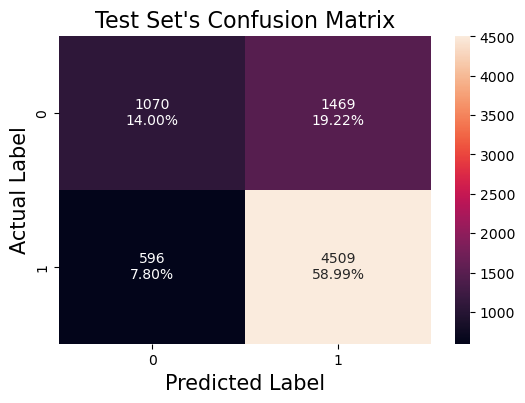

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(tnd_bagging)

# Check performance of model on both training and test data sets
perf_tnd_bagging = get_metrics_score(tnd_bagging)
perf_tnd_bagging

##### Observations
- As seen, the model seems to still overfit the training data.
- On the test data set, the tuned model's performance has been slightly improved compared to the initial bagging model - the F1-score has been increased from 0.77 for the initial model to 0.81 for the tuned model.

# Random Forest Classifier

In [ ]:
# Use function RandomForestClassifier from sklearn to build model
rndm_frst = RandomForestClassifier(random_state=1)
rndm_frst.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,1.000000,1.000000,1.000000,1.00000
Test,0.717949,0.829775,0.766974,0.79714


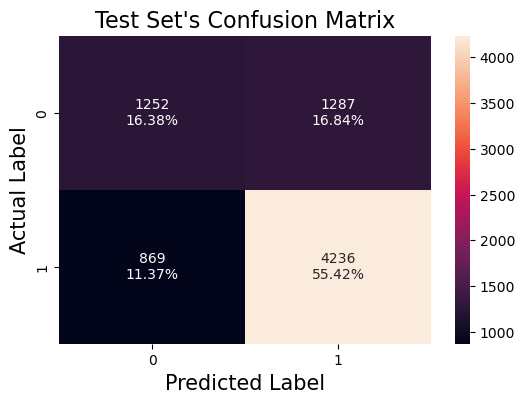

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(rndm_frst)

# Check performance of model on both training and test data sets
perf_rndm_frst = get_metrics_score(rndm_frst)
perf_rndm_frst

##### Observations
- Compared to the initial decision tree model (not tuned), this model also has slightly better performance on the test data set.
- However, the metrics all equal 1.00 for the training data set, indicating overfitting. As a result, there is need for hyperparameter tuning.

### Random Forest Classifier with Hyperparameter Tuning

In [ ]:
#### Choose type of classifier
# Set oob_score as True to consider out-of-bag samples to estimate generalization score
tnd_rndm_frst = RandomForestClassifier(oob_score=True, random_state=1)

# Form grid of parameters to search in
grid_para = {
    "class_weight": ["balanced", None],
    "max_samples": [0.7, 0.8, 0.9, 1.0],
    "max_depth": np.arange(1, 5, 1),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [100, 200, 400, 800],
    "n_estimators": np.arange(20, 110, 20),
}

# Set type of score used to evaluate performance throughout search
scorer = make_scorer(f1_score)

# Run GridSearch
grid_obj = GridSearchCV(tnd_rndm_frst, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set classifer to best combination of parameters
tnd_rndm_frst = grid_obj.best_estimator_

# Fit best decision tree to training data
tnd_rndm_frst.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', max_samples=0.8,
                       min_samples_split=200, n_estimators=60, oob_score=True,
                       random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.730433,0.928649,0.736502,0.821490
Test,0.720173,0.927326,0.728084,0.815715


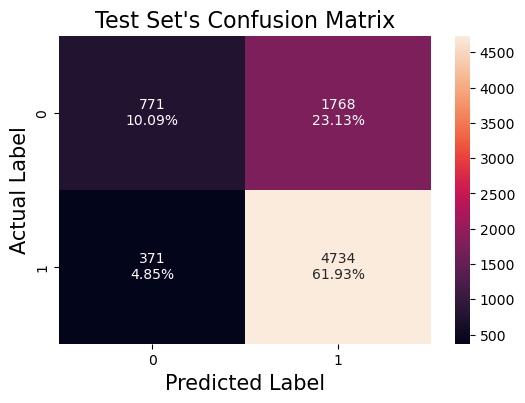

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(tnd_rndm_frst)

# Check performance of model on both training and test data sets
perf_tnd_rndm_frst = get_metrics_score(tnd_rndm_frst)
perf_tnd_rndm_frst

##### Observations
- The performance metrics are very close for the training and test data sets, showing that the model is not overfitting anymore.
- Compared to the initial random forest model (before tuning), on the test data, precision has decreased, but recall and F1-score have been increased.

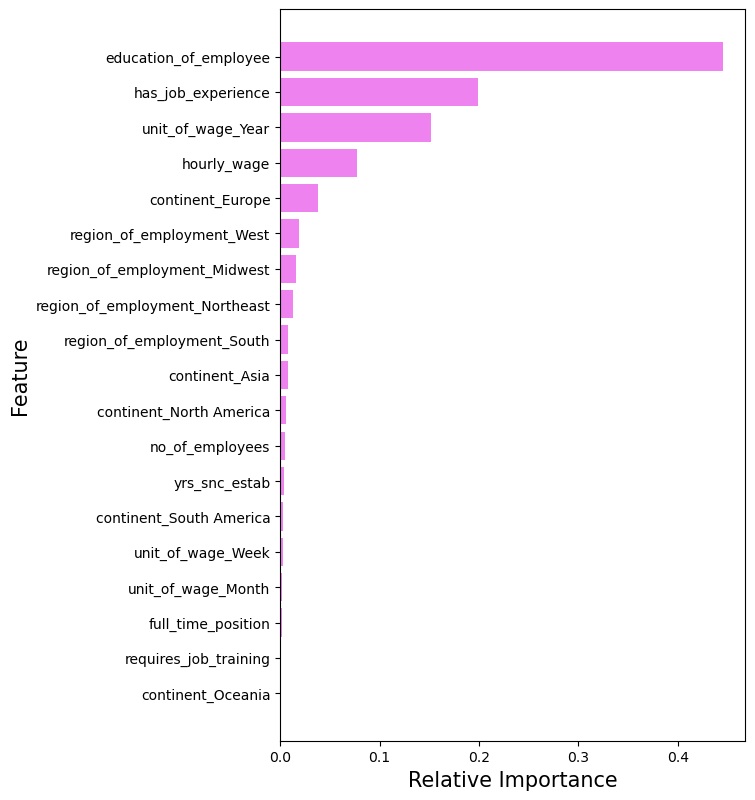

<IPython.core.display.Javascript object>

In [ ]:
# Check importances of various features of tuned random forest classifier
importances = tnd_rndm_frst.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 0.5 * len(col_names)))
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [col_names[i] for i in indices])
plt.xlabel("Relative Importance", fontsize=15)
plt.ylabel("Feature", fontsize=15)
plt.show()

##### Observations
- The top four independent features of importance in the tuned random forest model are `education_of_employee`, `has_job_experience`, `unit_of_wage_Year`, and `hourly_wage`. Compared to the imprtant features in the tuned decision tree, only `continent_Europe` has been replaced with `hourly_wage`.

# AdaBoost Classifier

In [ ]:
# Use function AdaBoostClassifier from sklearn to build model
ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(X_train, Y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.737441,0.888105,0.759512,0.818790
Test,0.733647,0.885994,0.756734,0.816279


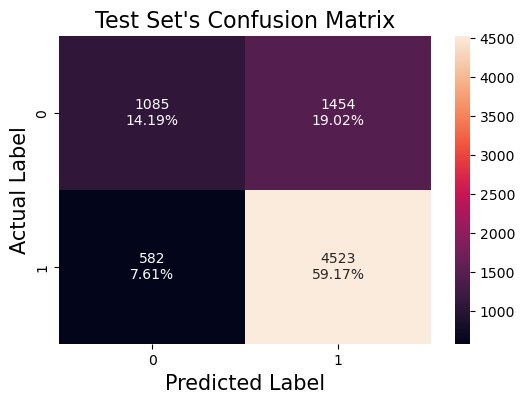

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(ada_boost)

# Check performance of model on both training and test data sets
perf_ada_boost = get_metrics_score(ada_boost)
perf_ada_boost

##### Observations
- The model seems to already be generalizable, as the performance metrics for the training and test data sets are very close.
- Yet, a hyperparameter tuning may help to improve the model's performance.

### AdaBoost Classifier with Hyperparameter Tuning

In [ ]:
# Choose type of classifier
tnd_ada_boost = AdaBoostClassifier(random_state=1)

# Form grid of parameters to search in
grid_para = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(20, 110, 20),
    "learning_rate": np.arange(0.2, 1.1, 0.2),
}

# Set type of score used to evaluate performance throughout search
scorer = make_scorer(f1_score)

# Run GridSearch
grid_obj = GridSearchCV(tnd_ada_boost, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set classifer to best combination of parameters
tnd_ada_boost = grid_obj.best_estimator_

# Fit best decision tree to training data
tnd_ada_boost.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.2, n_estimators=20, random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.752579,0.886259,0.775411,0.827138
Test,0.741889,0.880901,0.767144,0.820097


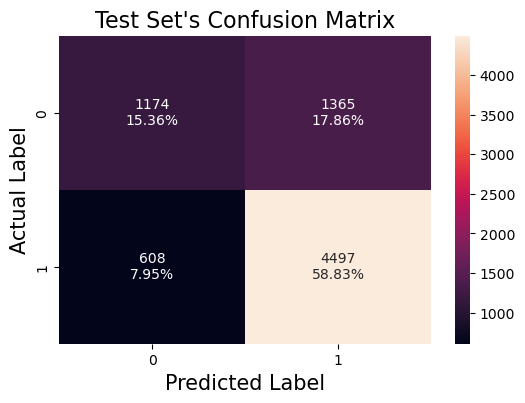

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(tnd_ada_boost)

# Check performance of model on both training and test data sets
perf_tnd_ada_boost = get_metrics_score(tnd_ada_boost)
perf_tnd_ada_boost

##### Observations
- No significant improvement is observed in the model performance after tuning.

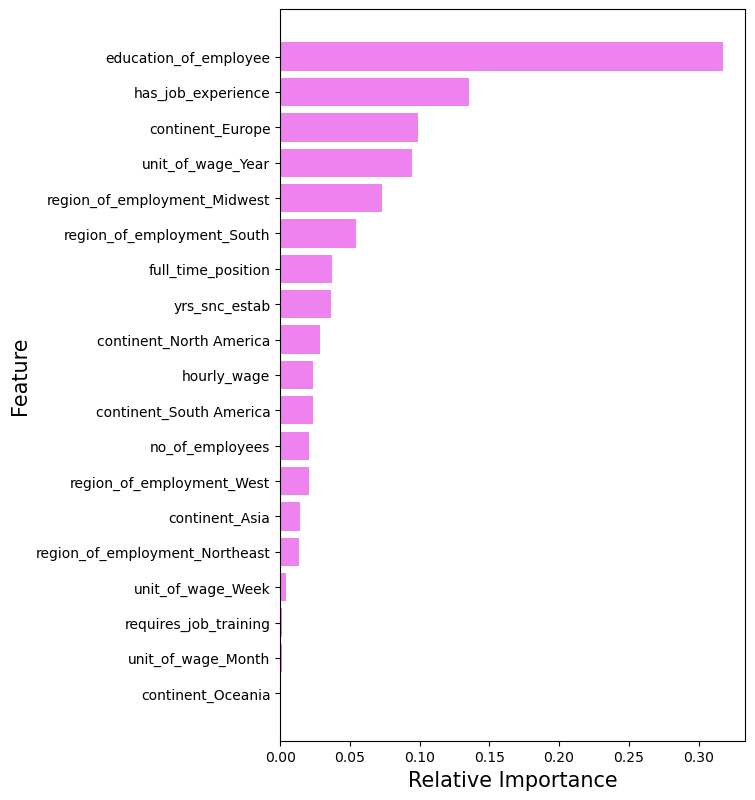

<IPython.core.display.Javascript object>

In [ ]:
# Check importances of various features of tuned AdaBoost classifier
importances = tnd_ada_boost.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 0.5 * len(col_names)))
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [col_names[i] for i in indices])
plt.xlabel("Relative Importance", fontsize=15)
plt.ylabel("Feature", fontsize=15)
plt.show()

##### Observations
- The top four independent features of importance in the tuned AdaBoost model are `education_of_employee`, `has_job_experience`, `continent_Europe`, and `unit_of_wage_Year`.

# Gradient Boosting Classifier

In [ ]:
# Use function GradientBoostingClassifier from sklearn to build model
grdnt_boost = GradientBoostingClassifier(random_state=1)
grdnt_boost.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.756448,0.878368,0.783292,0.828110
Test,0.744767,0.875220,0.772743,0.820795


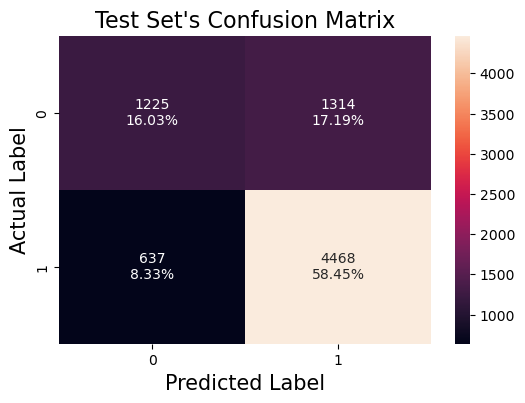

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(grdnt_boost)

# Check performance of model on both training and test data sets
perf_grdnt_boost = get_metrics_score(grdnt_boost)
perf_grdnt_boost

##### Observations
- The model already seems to perform well on both the training and test data sets and does not show overfitting.
- The F1-score for both training and test data sets is above 0.82, which is quite good.

### Gradient Boosting Classifier with Hyperparameter Tuning

In [ ]:
# Choose type of classifier
tnd_grdnt_boost = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Form grid of parameters to search in
grid_para = {
    "subsample": [0.8, 0.9, 1.0],
    "max_features": [0.8, 0.9, 1.0],
    "n_estimators": np.arange(20, 110, 20),
    "learning_rate": np.arange(0.2, 1.1, 0.2),
}

# Set type of score used to evaluate performance throughout search
scorer = make_scorer(f1_score)

# Run GridSearch
grid_obj = GridSearchCV(tnd_grdnt_boost, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set classifer to best combination of parameters
tnd_grdnt_boost = grid_obj.best_estimator_

# Fit best decision tree to training data
tnd_grdnt_boost.fit(X_train, Y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=1.0, n_estimators=20,
                           random_state=1, subsample=0.9)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.750280,0.880467,0.775871,0.824866
Test,0.744636,0.880705,0.769995,0.821637


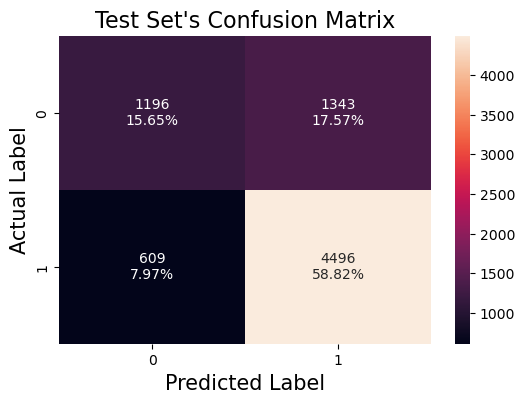

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(tnd_grdnt_boost)

# Check performance of model on both training and test data sets
perf_tnd_grdnt_boost = get_metrics_score(tnd_grdnt_boost)
perf_tnd_grdnt_boost

##### Observations
- The hyperparameter tuning barely improves the performance of the gradient boosting model.

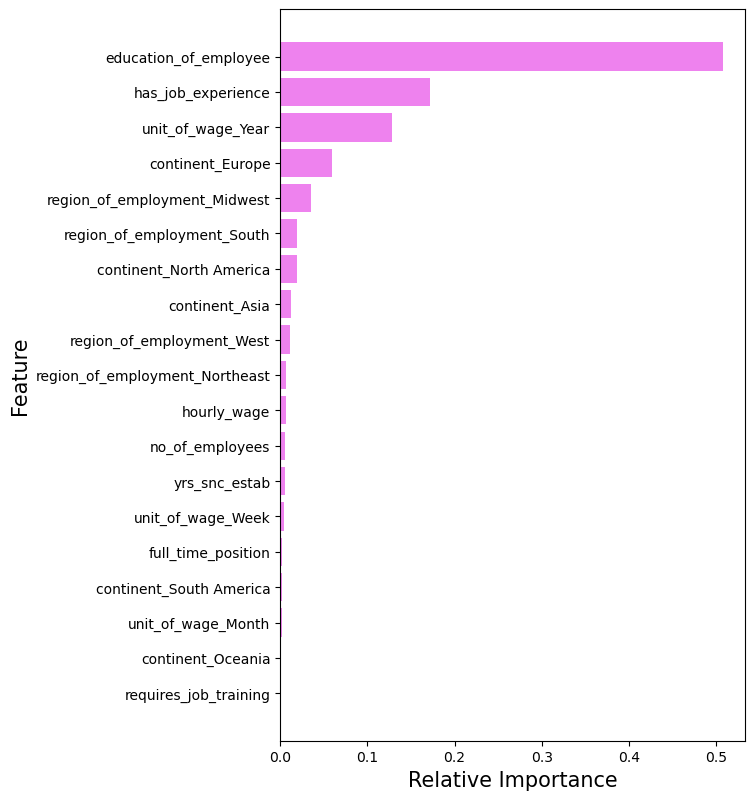

<IPython.core.display.Javascript object>

In [ ]:
# Check importances of various features of tuned gradient boosting classifier
importances = tnd_grdnt_boost.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 0.5 * len(col_names)))
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [col_names[i] for i in indices])
plt.xlabel("Relative Importance", fontsize=15)
plt.ylabel("Feature", fontsize=15)
plt.show()

##### Observations
- The top four independent features of importance in the tuned gradient boosting model are `education_of_employee`, `has_job_experience`, `unit_of_wage_Year`, and `continent_Europe`.

# XGBoost Classifier

In [ ]:
# Use function XGBClassifier from xgboost to build model
xg_boost = XGBClassifier(eval_metric="logloss", random_state=1)
xg_boost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.836230,0.929069,0.842057,0.883426
Test,0.730115,0.854848,0.767499,0.808822


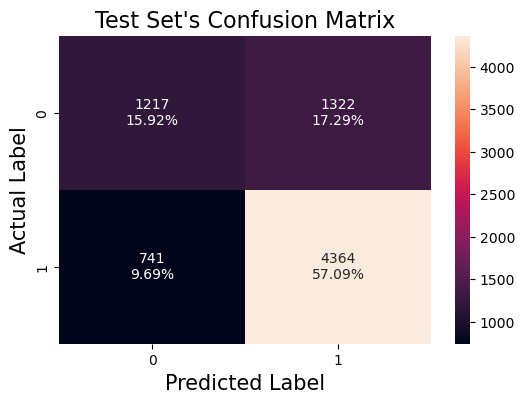

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(xg_boost)

# Check performance of model on both training and test data sets
perf_xg_boost = get_metrics_score(xg_boost)
perf_xg_boost

##### Observations
- The model is slightly overfitting because its performance is better on the training data set than on the test data set.
- Hyperparameter tuning could be used to see if further improvement is possible.

### XGBoost Classifier with Hyperparameter Tuning

In [ ]:
# Choose type of classifier
tnd_xg_boost = XGBClassifier(eval_metric="logloss", random_state=1)

# Form grid of parameters to search in
grid_para = {
    "subsample": [0.8, 1.0],
    "scale_pos_weight": [1, 2],
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 1.0],
    "colsample_bylevel": [0.8, 1.0],
    "n_estimators": [50, 100],
    "learning_rate": [0.1, 0.2],
}

# Set type of score used to evaluate performance throughout search
scorer = make_scorer(f1_score)

# Run GridSearch
grid_obj = GridSearchCV(tnd_xg_boost, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set classifer to best combination of parameters
tnd_xg_boost = grid_obj.best_estimator_

# Fit best decision tree to training data
tnd_xg_boost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='logloss', gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.763568,0.884328,0.787722,0.833234
Test,0.746337,0.873849,0.775017,0.821471


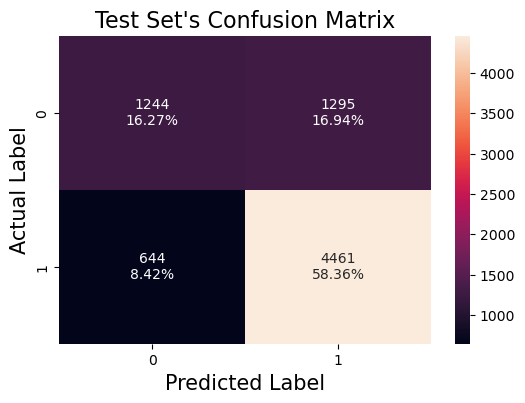

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(tnd_xg_boost)

# Check performance of model on both training and test data sets
perf_tnd_xg_boost = get_metrics_score(tnd_xg_boost)
perf_tnd_xg_boost

##### Observations
- The tuned XGBoost model provides similar performances on both the training and test data sets.
- The model's performance on the test set was improved slightly via tuning, increasing the F1-score from 0.81 to 0.82.

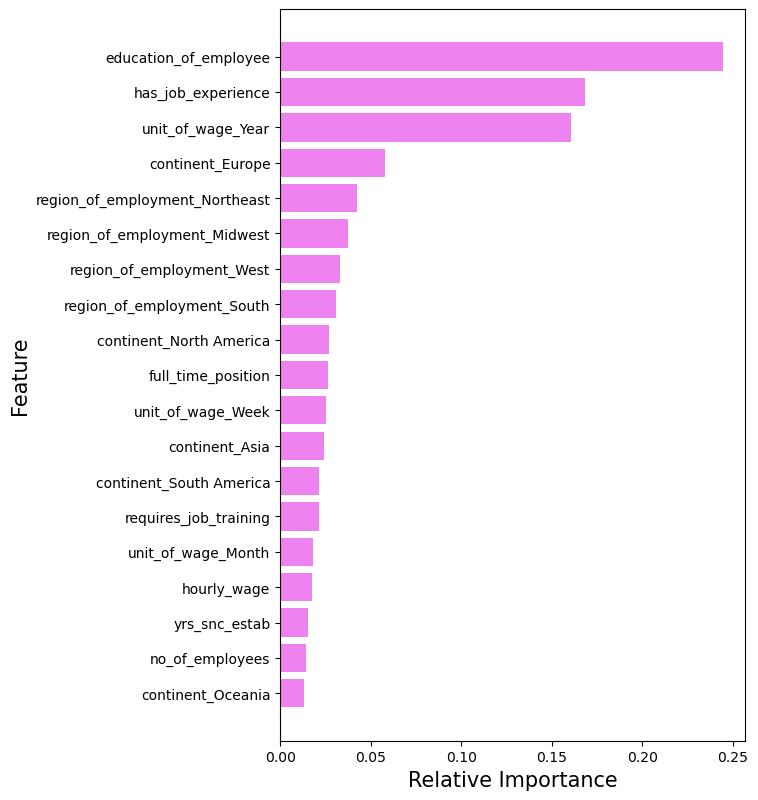

<IPython.core.display.Javascript object>

In [ ]:
# Check importances of various features of tuned XGBoost classifier
importances = tnd_xg_boost.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 0.5 * len(col_names)))
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [col_names[i] for i in indices])
plt.xlabel("Relative Importance", fontsize=15)
plt.ylabel("Feature", fontsize=15)
plt.show()

##### Observations
- The top four independent features of importance in the tuned XGBoost model are `education_of_employee`, `unit_of_wage_Year`, `has_job_experience`, and `continent_Europe`.

# Stacking Classifier

In [ ]:
# Use function XGBClassifier from sklearn to build model
stacking = StackingClassifier(
    estimators=[
        ("Decision Tree", tnd_dcsn_tree),
        ("Random Forest", tnd_rndm_frst),
        ("AdaBoost", tnd_ada_boost),
        ("Gradient Boosting", tnd_grdnt_boost),
    ],
    final_estimator=tnd_xg_boost,
)
stacking.fit(X_train, Y_train)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=4,
                                                       max_leaf_nodes=14,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_split=100,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=4,
                                                       max_features='sqrt',
                                                       max_samples=0.8,
                                                       min_samples_split=200,
                                                       n_estimators=60,
                                                       oob_score=True,
                                                       random_state=1)),
              

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Training,0.751962,0.865021,0.785382,0.823280
Test,0.743721,0.863271,0.777523,0.818157


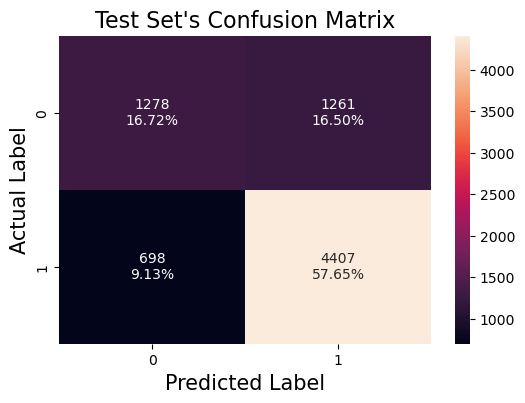

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix based on test data set
make_confusion_matrix(stacking)

# Check performance of model on both training and test data sets
perf_stacking = get_metrics_score(stacking)
perf_stacking

##### Observations
- The stacking model has a similar performance to the tuned XGBoost in terms of all metrics. Specifically, the F1-score is 0.82 for both the training and test data sets.

# Comparison of Model Performances

In [ ]:
# Create a data frame with summary of model performance on training data set
perf_train = pd.concat(
    [
        perf_dcsn_tree.loc["Training"].T,
        perf_tnd_dcsn_tree.loc["Training"].T,
        perf_bagging.loc["Training"].T,
        perf_tnd_bagging.loc["Training"].T,
        perf_rndm_frst.loc["Training"].T,
        perf_tnd_rndm_frst.loc["Training"].T,
        perf_ada_boost.loc["Training"].T,
        perf_tnd_ada_boost.loc["Training"].T,
        perf_grdnt_boost.loc["Training"].T,
        perf_tnd_grdnt_boost.loc["Training"].T,
        perf_xg_boost.loc["Training"].T,
        perf_tnd_xg_boost.loc["Training"].T,
        perf_stacking.loc["Training"].T,
    ],
    axis=1,
)

perf_train.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging",
    "Tuned Bagging",
    "Random Forest",
    "Tuned Random Forest",
    "AdaBoost",
    "Tuned AdaBoost",
    "Gradient Boosting",
    "Tuned Gradient Boosting",
    "XGBoost",
    "Tuned XGBoost",
    "Stacking",
]

print("Model Performance Comparison for Training Data Set:")
perf_train

Model Performance Comparison for Training Data Set:


,Decision Tree,Tuned Decision Tree,Bagging,Tuned Bagging,Random Forest,Tuned Random Forest,AdaBoost,Tuned AdaBoost,Gradient Boosting,Tuned Gradient Boosting,XGBoost,Tuned XGBoost,Stacking
Accuracy,1.0,0.737105,0.984077,0.984806,1.0,0.730433,0.737441,0.752579,0.756448,0.750280,0.836230,0.763568,0.751962
Recall,1.0,0.912784,0.985562,0.998405,1.0,0.928649,0.888105,0.886259,0.878368,0.880467,0.929069,0.884328,0.865021
Precision,1.0,0.748692,0.990551,0.979252,1.0,0.736502,0.759512,0.775411,0.783292,0.775871,0.842057,0.787722,0.785382
F1,1.0,0.822635,0.988050,0.988736,1.0,0.821490,0.818790,0.827138,0.828110,0.824866,0.883426,0.833234,0.823280


<IPython.core.display.Javascript object>

##### Observations
- Among the examined classifiers, *Decision Tree*, *Bagging*, *Tuned Bagging*, and *Random Forest* are overfitting the training data set.
- The remaining models perform almost similarly in terms of F1-score, except *XGBoost* that outperforms others.

In [ ]:
# Create a data frame with summary of model performance on training data set
perf_test = pd.concat(
    [
        perf_dcsn_tree.loc["Test"].T,
        perf_tnd_dcsn_tree.loc["Test"].T,
        perf_bagging.loc["Test"].T,
        perf_tnd_bagging.loc["Test"].T,
        perf_rndm_frst.loc["Test"].T,
        perf_tnd_rndm_frst.loc["Test"].T,
        perf_ada_boost.loc["Test"].T,
        perf_tnd_ada_boost.loc["Test"].T,
        perf_grdnt_boost.loc["Test"].T,
        perf_tnd_grdnt_boost.loc["Test"].T,
        perf_xg_boost.loc["Test"].T,
        perf_tnd_xg_boost.loc["Test"].T,
        perf_stacking.loc["Test"].T,
    ],
    axis=1,
)

perf_test.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging",
    "Tuned Bagging",
    "Random Forest",
    "Tuned Random Forest",
    "AdaBoost",
    "Tuned AdaBoost",
    "Gradient Boosting",
    "Tuned Gradient Boosting",
    "XGBoost",
    "Tuned XGBoost",
    "Stacking",
]

print("Model Performance Comparison for Test Data Set:")
perf_test

Model Performance Comparison for Test Data Set:


,Decision Tree,Tuned Decision Tree,Bagging,Tuned Bagging,Random Forest,Tuned Random Forest,AdaBoost,Tuned AdaBoost,Gradient Boosting,Tuned Gradient Boosting,XGBoost,Tuned XGBoost,Stacking
Accuracy,0.652669,0.729853,0.690345,0.729853,0.717949,0.720173,0.733647,0.741889,0.744767,0.744636,0.730115,0.746337,0.743721
Recall,0.736729,0.911851,0.770813,0.883252,0.829775,0.927326,0.885994,0.880901,0.875220,0.880705,0.854848,0.873849,0.863271
Precision,0.741522,0.742424,0.766758,0.754266,0.766974,0.728084,0.756734,0.767144,0.772743,0.769995,0.767499,0.775017,0.777523
F1,0.739118,0.818462,0.768780,0.813679,0.797140,0.815715,0.816279,0.820097,0.820795,0.821637,0.808822,0.821471,0.818157


<IPython.core.display.Javascript object>

##### Observations
- *Tuned Gradient Boosting* model slightly outperforms all other models in terms of F1-score.
- However, *Tuned Decision Tree*, *Tuned Bagging*, *Tuned Random Forest*, *AdaBoost*, *Tuned AdaBoost*, *Gradient Boosting*, *Tuned Gradient Boosting*, *XGBoost*, *Tuned XGBoost*, and *Stacking* all provide close F1-scores (0.81-0.82).

##### Selection of Final Model
- Considering the model performance, its interpretability, and its simplicity altogether, the **tuned decision tree** is selected as the final model.

# Final Model

#### Visualization

[Text(0.4375, 0.9, 'node #0\neducation_of_employee <= 1.5\ngini = 0.444\nsamples = 17836\nvalue = [5923, 11913]\nclass = y[1]'),
 Text(0.20833333333333334, 0.7, 'node #1\ncontinent_Asia <= 0.5\ngini = 0.446\nsamples = 2418\nvalue = [1607, 811]\nclass = y[0]'),
 Text(0.125, 0.5, 'node #13\ncontinent_Europe <= 0.5\ngini = 0.492\nsamples = 793\nvalue = [448, 345]\nclass = y[0]'),
 Text(0.08333333333333333, 0.3, 'node #17\nhas_job_experience <= 0.5\ngini = 0.5\nsamples = 442\nvalue = [217, 225]\nclass = y[1]'),
 Text(0.041666666666666664, 0.1, 'node #19\ngini = 0.458\nsamples = 180\nvalue = [116, 64]\nclass = y[0]'),
 Text(0.125, 0.1, 'node #20\ngini = 0.474\nsamples = 262\nvalue = [101, 161]\nclass = y[1]'),
 Text(0.16666666666666666, 0.3, 'node #18\ngini = 0.45\nsamples = 351\nvalue = [231, 120]\nclass = y[0]'),
 Text(0.2916666666666667, 0.5, 'node #14\nregion_of_employment_West <= 0.5\ngini = 0.409\nsamples = 1625\nvalue = [1159, 466]\nclass = y[0]'),
 Text(0.25, 0.3, 'node #23\nregion_

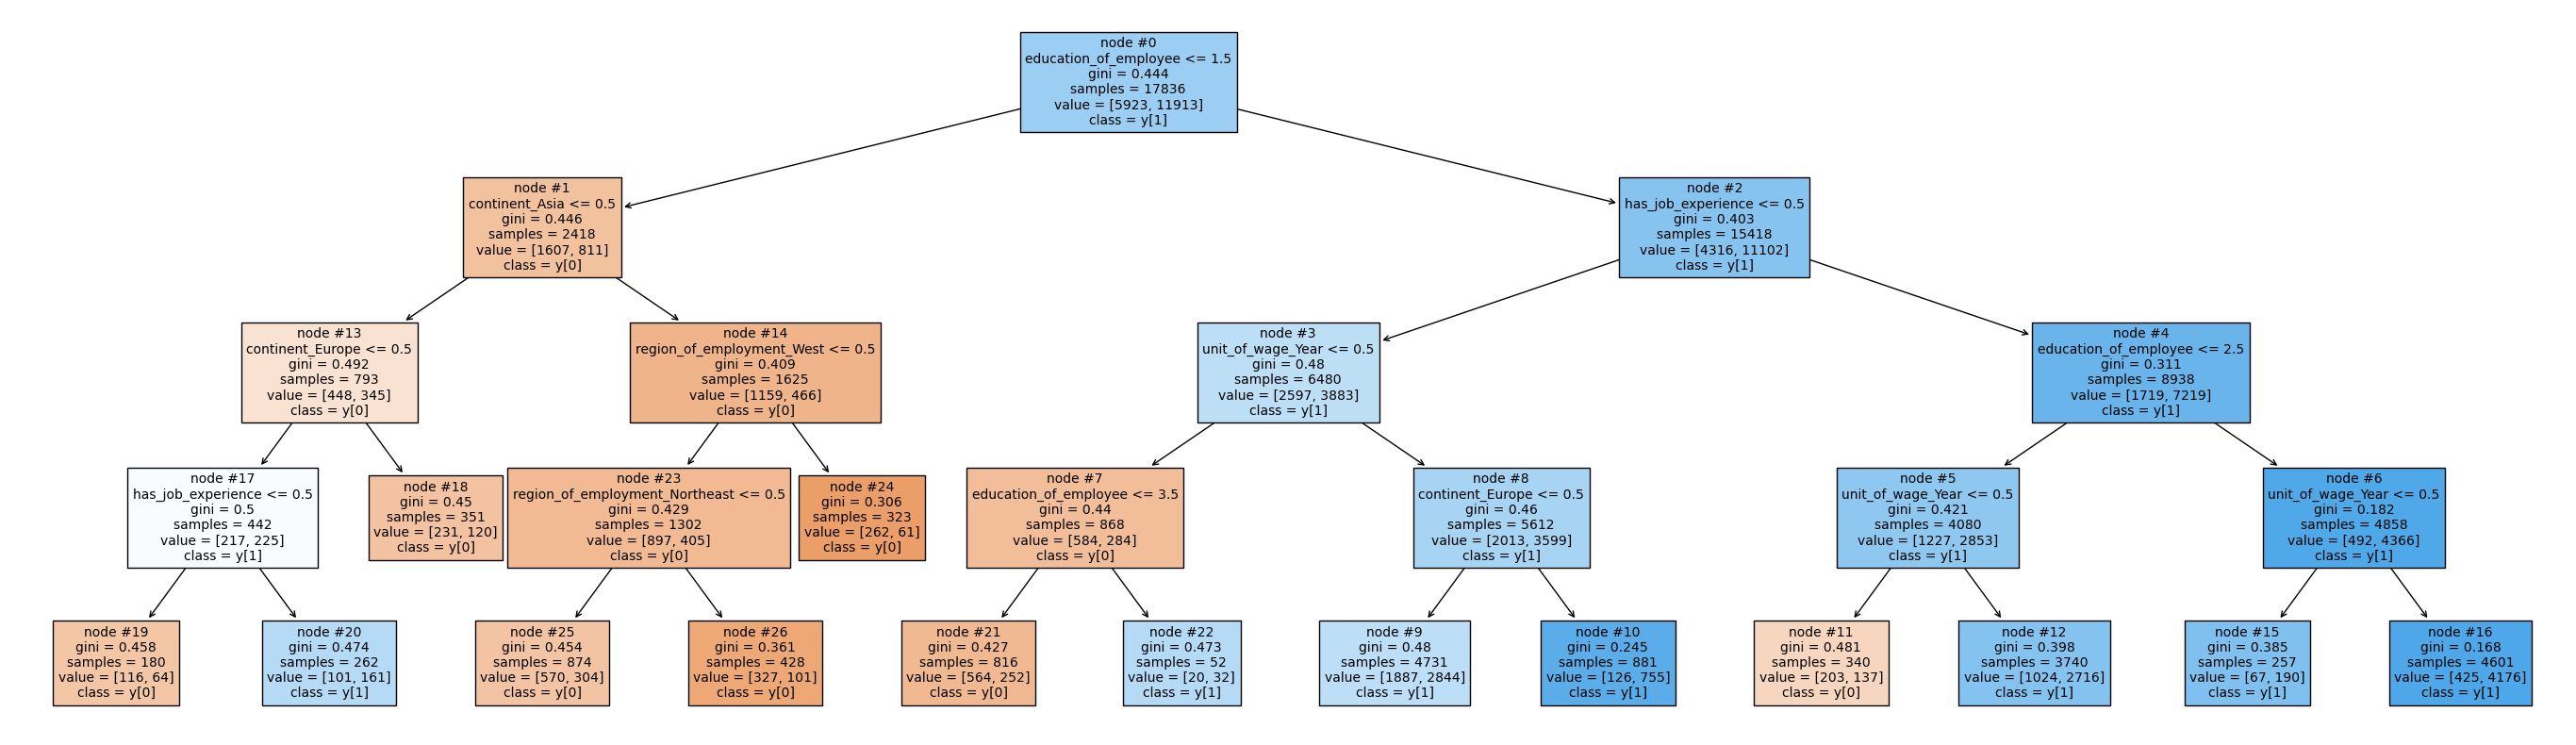

<IPython.core.display.Javascript object>

In [ ]:
# Plot tuned tree
plt.figure(figsize=(35, 10))

plot_tree(
    decision_tree=tnd_dcsn_tree,
    feature_names=col_names,
    filled=True,
    fontsize=10,
    node_ids=True,
    class_names=True,
)

# Important Features

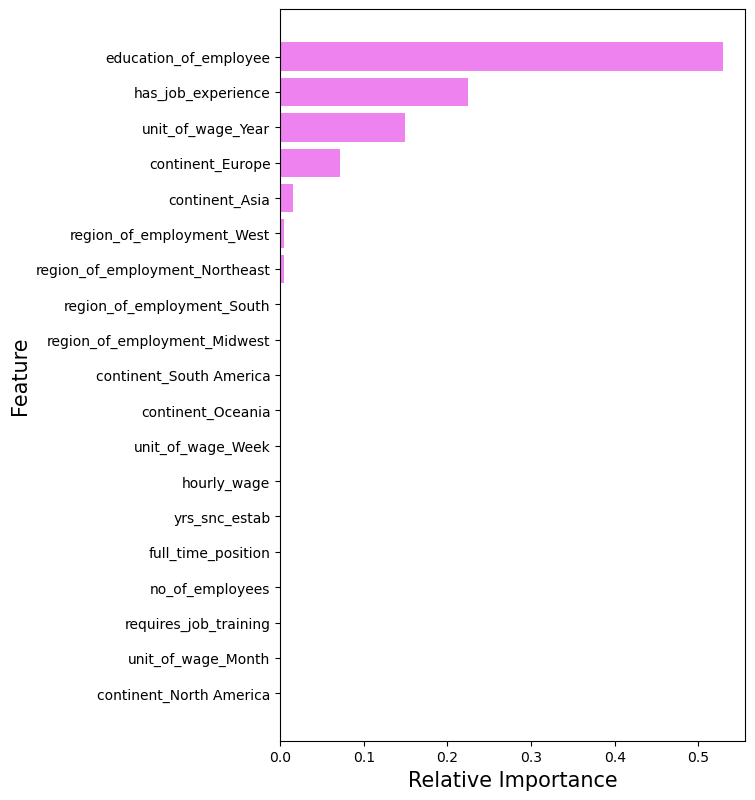

<IPython.core.display.Javascript object>

In [ ]:
# Check importances of various features of tuned tree
importances = tnd_dcsn_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 0.5 * len(col_names)))
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [col_names[i] for i in indices])
plt.xlabel("Relative Importance", fontsize=15)
plt.ylabel("Feature", fontsize=15)
plt.show()

# Insights and Recommendations
### Insights

- According to the EDA:
    - The majority (66%) of work via applications are from Asia.
    - A large portion (78%) of the applicants have a bachelor's or a master's degree and only less than 9% have a doctrate degree.
    - Most (58%) of the applicants have job experience.
    - The vast majority of offerred jobs (88%) do not require training.
    - The majority (>81%) of the offered jobs are for Northeast, South, and West regions of the US.
    - The majority (89%) of the offered positions are full-time.
    - Merely about 10% of the positions have a wage unit other than Year.
    - About 2/3 of the work visa applications are certified.
    - The European and South American applicants have the highest and the lowest chances of visa certification, respectively.
    - The higher the applicant's education level is, the more their chances of visa certification are.
    - Having job experience increases the chances of visa certification.
    - Job training requirement has a negligible effect on visa certification likelihood.
    - The visa applications for the employment in the Midwest region are more likely to be certified than the applications for the employment in other regions.
    - Being a full- or part-time position does not observably affect the visa certification likelihood.
    - The offered positions with the wage units of Year and Hour have the highest and the lowest chances of visa certification, respectively.
    - The employer's number of employees has an insignificant impact on the chances of visa certification for its potential foreign employees.
    - The majority of employers applying for work visas are less than 40 years old.
    - The majority of the applications are for the jobs with an equivalent hourly wage of less than 100 (probably in dollars).
    - The positions with certified visa applications are on average of lower equivalent hourly wages than the positions with denied visa applications.
    - The age of an employer has negligible effect on the likelihood of visa certification.

- According to the fitted classifiers:
    - Almost all the classifiers perform similarly, but the *Tuned Gradient Boosting* model slightly outperforms other models in terms of F1-score - it provided the maximum F1-score of 0.822 on the test data.
    - Overall, the features `education_of_employee`, `has_job_experience`, and `unit_of_wage_Year` are among the top four important variables affecting the visa certification likelihood. Other variables of importance are `continent_Europe` and `hourly_wage`.
    - According to the final selected model, i.e., *Tuned Decision Tree*:
        - The top four variables of importance when predicting a visa certification are `education_of_employee`, `has_job_experience`, `unit_of_wage_Year`, and `continent_Europe`.
        - The applicants meeting the following criteria have high chances of visa *certification*:
            - Having a master's or a doctorate degree (`education_of_employee` > 2.5); having job experience (`has_job_experience` > 0.5); and applying for a position with a prevailing wage unit of year (`unit_of_wage_Year` > 0.5)
            - Having a university degree (`education_of_employee` > 1.5); having no job experience (`has_job_experience` <= 0.5); applying for a position with a prevailing wage unit of year (`unit_of_wage_Year` > 0.5); and being from Europe (`continent_Europe` > 0.5)
            - Having a bachelor's degree (1.5 < `education_of_employee` <= 2.5); having job experience (`has_job_experience` > 0.5); and applying for a position with a prevailing wage unit of year (`unit_of_wage_Year` > 0.5)
        - The applicants meeting the following criteria have high chances of visa *denial*:
            - Having a bachelor's or a master's degree (1.5 < `education_of_employee` <= 3.5); having no job experience (`has_job_experience` <= 0.5); and applying for a position with a prevailing wage unit other than year (`unit_of_wage_Year` <= 0.5)
            - Having no university degree (`education_of_employee` <= 1.5); being from Asia (`continent_Asia` > 0.5); and being employed in the West region (`region_of_employment_West` > 0.5)
            - Having no university degree (`education_of_employee` <= 1.5); being from Asia (`continent_Asia` > 0.5); and being employed in the Northeast region (`region_of_employment_Northeast` > 0.5)
            

### Recommendations
- Considering its relative simplicity and interpretability, the *Tuned Decision Tree* model is recommended to OFLC as the final classifier. If an ensemble model is preferred for reducing the bias, the *Tuned Gradient Boosting* model is recommended.
- Given the above insights, OFLC shall particularly consider the applicants' level of education, their job experience, and their prevailing wage unit in its visa certification probability estimations. The applicants who have a higher education, have job experience, and their US employment's wage unit is year are more likely to be eventually certified for a work visa. Being from Europe also increases the chances of visa certification in certain cases.
- In order to avoid workforce shortage in the US, especially in high-demand industries that depend on foreign employees, it is recommended that OFLC prioritizes the processing of the visa applications that have higher chances of certification based on the developed classification models.
- To minimize the waste of OFLC's resources, it could quickly deny the applications that have very high chances of denial based on the prediction models - such applications could be reprocessed by a different section if appealed by the applicants/employers.
- It is recommended that some other potentially important variables are also considered in the classification model development - examples are the industry of employment (e.g., medical, engineering, finance, agriculture, etc.), the applicant's amount of experience (e.g., in years), the agreement of the applicant's qualifications with the job, and the employer's socioeconomic benefits to the US.
- More sophisticated ML-based classification models are also recommended to be tried for this purpose.